# Group Project Machine Learning 2024 - THE BET ADVISORY

In the course of this group project we will act as a bet advisory company, offering predictions on future games to our customers.

Users will be able to set a desired risk profile, ranging from the safest, 1, to the riskiest, 3.

The models will provide predictions on the games week by week, simulating a real world scenario in which we send out to our customers predictions for next week's games.

We will then proceed with a quick analysis of the results and of the possible monetary returns.

## Importing the data and preparing it for feature engineering

In [42]:
# loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Loading the data

# Bundesliga
b14_15 = pd.read_csv('bundesliga/2014-2015.csv')
b15_16 = pd.read_csv('bundesliga/2015-2016.csv')
b16_17 = pd.read_csv('bundesliga/2016-2017.csv')
b17_18 = pd.read_csv('bundesliga/2017-2018.csv')
b18_19 = pd.read_csv('bundesliga/2018-2019.csv')
b19_20 = pd.read_csv('bundesliga/2019-2020.csv')
b20_21 = pd.read_csv('bundesliga/2020-2021.csv')
b21_22 = pd.read_csv('bundesliga/2021-2022.csv')

# Premier league
e14_15 = pd.read_csv('epl/2014-2015.csv')
e15_16 = pd.read_csv('epl/2015-2016.csv')
e16_17 = pd.read_csv('epl/2016-2017.csv')
e17_18 = pd.read_csv('epl/2017-2018.csv')
e18_19 = pd.read_csv('epl/2018-2019.csv')
e19_20 = pd.read_csv('epl/2019-2020.csv')
e20_21 = pd.read_csv('epl/2020-2021.csv')
e21_22 = pd.read_csv('epl/2021-2022.csv')

# La Liga
l14_15 = pd.read_csv('la_liga/2014-2015.csv')
l15_16 = pd.read_csv('la_liga/2015-2016.csv')
l16_17 = pd.read_csv('la_liga/2016-2017.csv')
l17_18 = pd.read_csv('la_liga/2017-2018.csv')
l18_19 = pd.read_csv('la_liga/2018-2019.csv')
l19_20 = pd.read_csv('la_liga/2019-2020.csv')
l20_21 = pd.read_csv('la_liga/2020-2021.csv')
l21_22 = pd.read_csv('la_liga/2021-2022.csv')

# Serie A
s14_15 = pd.read_csv('serie_a/2014-2015.csv')
s15_16 = pd.read_csv('serie_a/2015-2016.csv')
s16_17 = pd.read_csv('serie_a/2016-2017.csv')
s17_18 = pd.read_csv('serie_a/2017-2018.csv')
s18_19 = pd.read_csv('serie_a/2018-2019.csv')
s19_20 = pd.read_csv('serie_a/2019-2020.csv')
s20_21 = pd.read_csv('serie_a/2020-2021.csv')
s21_22 = pd.read_csv('serie_a/2021-2022.csv')

# Ligue 1
f14_15 = pd.read_csv('ligue_1/2014-2015.csv')
f15_16 = pd.read_csv('ligue_1/2015-2016.csv')
f16_17 = pd.read_csv('ligue_1/2016-2017.csv')
f17_18 = pd.read_csv('ligue_1/2017-2018.csv')
f18_19 = pd.read_csv('ligue_1/2018-2019.csv')
f19_20 = pd.read_csv('ligue_1/2019-2020.csv')
f20_21 = pd.read_csv('ligue_1/2020-2021.csv')
f21_22 = pd.read_csv('ligue_1/2021-2022.csv')

In [44]:
# Season Labelling
b14_15['Season'] = 1
b15_16['Season'] = 2
b16_17['Season'] = 3
b17_18['Season'] = 4
b18_19['Season'] = 5
b19_20['Season'] = 6
b20_21['Season'] = 7
b21_22['Season'] = 8

e14_15['Season'] = 1
e15_16['Season'] = 2
e16_17['Season'] = 3
e17_18['Season'] = 4
e18_19['Season'] = 5
e19_20['Season'] = 6
e20_21['Season'] = 7
e21_22['Season'] = 8

l14_15['Season'] = 1
l15_16['Season'] = 2
l16_17['Season'] = 3
l17_18['Season'] = 4
l18_19['Season'] = 5
l19_20['Season'] = 6
l20_21['Season'] = 7
l21_22['Season'] = 8

s14_15['Season'] = 1
s15_16['Season'] = 2
s16_17['Season'] = 3
s17_18['Season'] = 4
s18_19['Season'] = 5
s19_20['Season'] = 6
s20_21['Season'] = 7
s21_22['Season'] = 8

f14_15['Season'] = 1
f15_16['Season'] = 2
f16_17['Season'] = 3
f17_18['Season'] = 4
f18_19['Season'] = 5
f19_20['Season'] = 6
f20_21['Season'] = 7
f21_22['Season'] = 8

In [45]:
def split_dataframe(df):
    """
    Split DataFrame into halves.

    Parameters:
    - df: pandas DataFrame to be split.

    Returns:
    - Two pandas DataFrames representing the first half and the second half of the input DataFrame.
    """
    mid_index = len(df) // 2
    first_half = df.iloc[:mid_index]
    second_half = df.iloc[mid_index:]
    return first_half, second_half

# Example usage:
b21_22_train, b21_22_test = split_dataframe(b21_22)
e21_22_train, e21_22_test = split_dataframe(e21_22)
l21_22_train, l21_22_test = split_dataframe(l21_22)
s21_22_train, s21_22_test = split_dataframe(s21_22)
f21_22_train, f21_22_test = split_dataframe(f21_22)


In [46]:
# Merging the data for league
bundesliga = pd.concat([b14_15, b15_16, b16_17, b17_18, b18_19, b19_20, b20_21, b21_22_train, b21_22_test])
epl = pd.concat([e14_15, e15_16, e16_17, e17_18, e18_19, e19_20, e20_21, e21_22_train, e21_22_test])
la_liga = pd.concat([l14_15, l15_16, l16_17, l17_18, l18_19, l19_20, l20_21, l21_22_train, l21_22_test])
serie_a = pd.concat([s14_15, s15_16, s16_17, s17_18, s18_19, s19_20, s20_21, s21_22_train, s21_22_test])
ligue_1 = pd.concat([f14_15, f15_16, f16_17, f17_18, f18_19, f19_20, f20_21, f21_22_train, f21_22_test])

In [47]:
# Concatenating the test data
all_leagues_test = pd.concat([b21_22_test, e21_22_test, l21_22_test, s21_22_test, f21_22_test])

all_leagues_test.sort_values(by='Date', inplace=True)
all_leagues_test.reset_index(drop=True, inplace=True)

all_leagues_test

,Div,Date,HomeTeam,AwayTeam,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,...,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,Season
0,E0,2022-01-03,Manchester United,Wolverhampton Wanderers,83,78,86,78,83,81,...,1.55,3.90,6.50,1.57,3.80,5.75,1.74,3.74,5.53,8
1,SP1,2022-01-03,Cadiz,Sevilla,74,82,75,81,75,81,...,4.80,3.40,1.80,4.60,3.30,1.80,6.58,3.62,1.68,8
2,I1,2022-01-06,Lazio,Empoli,79,71,80,73,80,70,...,1.57,4.33,5.25,1.57,4.10,5.50,1.58,4.60,5.68,8
3,I1,2022-01-06,Spezia,Verona,71,75,70,75,71,75,...,3.60,3.40,2.05,3.70,3.40,2.00,3.73,3.60,2.10,8
4,I1,2022-01-06,Sassuolo,Genoa,75,74,76,74,75,72,...,1.60,4.00,5.50,1.57,4.00,5.75,1.79,3.87,4.82,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,I1,2022-05-22,Inter,Sampdoria,82,75,82,77,82,75,...,1.11,8.50,23.00,1.09,9.50,26.00,1.13,10.24,24.74,8
909,I1,2022-05-22,Sassuolo,AC Milan,75,81,77,81,76,80,...,7.00,4.60,1.42,7.50,4.75,1.40,7.62,5.12,1.43,8
910,I1,2022-05-22,Salernitana,Udinese,71,74,71,75,71,73,...,1.70,4.00,4.50,1.70,3.90,4.80,1.89,4.01,4.07,8
911,E0,2022-05-22,Leicester,Southampton,80,76,80,75,80,76,...,1.88,3.80,3.75,1.83,3.80,3.80,1.70,4.39,4.67,8


In [48]:
# Merging the data for all leagues
all_leagues = pd.concat([bundesliga, epl, la_liga, serie_a, ligue_1])

# Sorting the data by date
all_leagues = all_leagues.sort_values(by='Date')

# Resetting the index
all_leagues = all_leagues.reset_index(drop=True)

# Displaying the data
all_leagues.sort_values(by='Date', inplace=True)
all_leagues

,Div,Date,HomeTeam,AwayTeam,HTOa,ATOa,HTAt,ATAt,HTMid,ATMid,...,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,Season
0,F1,2014-08-08,Reims,Paris Saint Germain,71,81,70,83,71,80,...,9.00,4.50,1.36,10.50,4.8,1.36,10.55,5.17,1.37,1
1,F1,2014-08-09,Bastia,Marseille,71,75,71,77,66,74,...,3.50,3.30,2.10,4.10,3.3,2.05,3.73,3.38,2.18,1
2,F1,2014-08-09,Evian Thonon Gaillard,Caen,69,68,68,69,71,68,...,2.40,3.10,3.10,2.45,3.2,3.20,2.41,3.20,3.42,1
3,F1,2014-08-09,Guingamp,Saint-Etienne,71,75,70,75,72,75,...,3.10,3.10,2.40,3.40,3.1,2.40,3.25,3.02,2.62,1
4,F1,2014-08-09,Lille,Metz,75,68,74,70,76,67,...,1.53,3.75,7.00,1.55,4.0,7.50,1.51,4.12,8.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14487,SP1,2022-05-22,Osasuna,Mallorca,76,74,77,75,76,74,...,3.40,3.30,2.15,3.20,3.4,2.15,2.97,3.29,2.63,8
14486,SP1,2022-05-22,Barcelona,Villarreal,83,80,83,79,85,81,...,2.05,3.90,3.20,2.05,3.8,3.10,2.08,3.91,3.49,8
14485,I1,2022-05-22,Salernitana,Udinese,71,74,71,75,71,73,...,1.70,4.00,4.50,1.70,3.9,4.80,1.89,4.01,4.07,8
14494,E0,2022-05-22,Chelsea,Watford,84,74,84,75,85,75,...,1.15,7.00,19.00,1.13,7.5,18.00,1.18,7.58,17.72,8


## EDA 

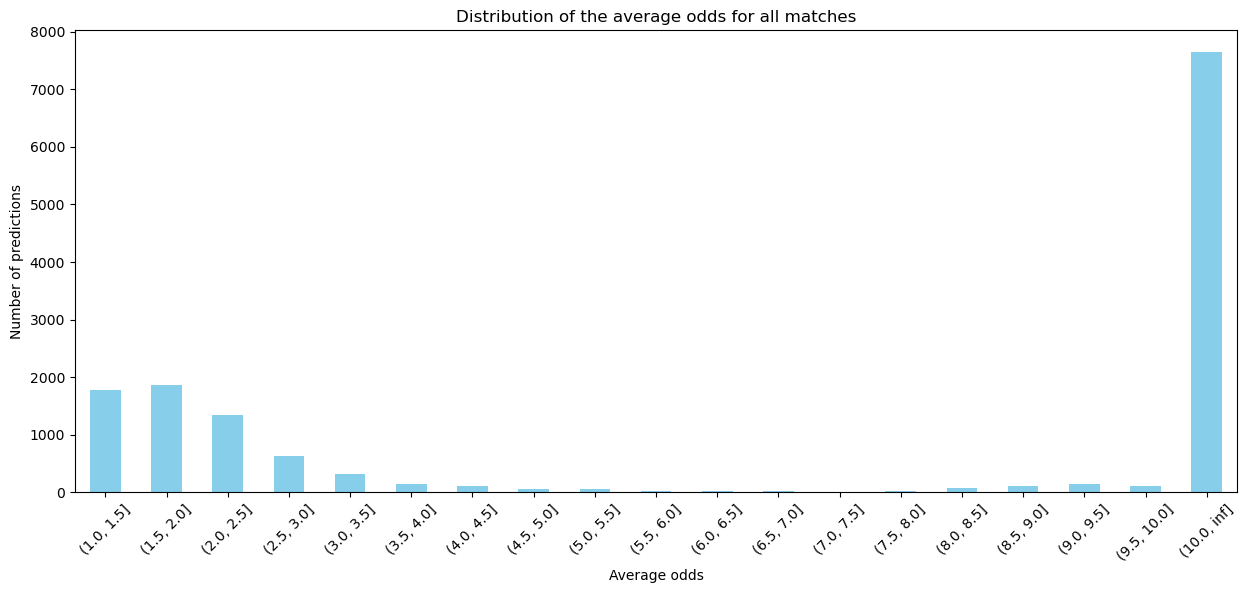

In [49]:
# Checking if the value distribution makes sense in comparison to the one of the entire dataset - KEEP IT IN THE EDA!
all_leagues_eda = all_leagues.copy()
all_leagues_eda['Odds_avg'] = all_leagues.apply(lambda x: (x['B365H']+x['BWH']+x['IWH']+x['PSH']+x['WHH']+x['VCH']+x['PSCH'])/7
                                            if x['FTR'] == 'H' else x['B365D']+x['BWD']+x['IWD']+x['PSD']+x['WHD']+x['VCD']+x['PSCD']
                                            if x['FTR'] == 'D' else x['B365A']+x['BWA']+x['IWA']+x['PSA']+x['WHA']+x['VCA']+x['PSCA'], axis=1)
bins = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, np.inf]
all_leagues_eda['Odds_avg_bins'] = pd.cut(all_leagues_eda['Odds_avg'], bins)

# The distribution of the predicted values make sense! The dataseta has a similar distribution
plt.figure(figsize=(15, 6))
all_leagues_eda['Odds_avg_bins'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of the average odds for all matches')
plt.xlabel('Average odds')
plt.ylabel('Number of predictions')
plt.xticks(rotation=45)
plt.show()


## Feature Engineering

All the features will be shifted down of one game to prevent for data leakage (e.g.: the avg goals per game of a team won't be calculated using data from the game we are trying to predict)

In [50]:
# Adding the discipline scores to the dataframes - Yinka Feature

def calculate_disciplinary_scores(df, yellow_card_weight=1, red_card_weight=2, window_size=3):

    # Calculate weighted disciplinary score for home and away teams
    df['HomeDiscScore'] = (df['HY'] * yellow_card_weight + df['HR'] * red_card_weight)
    df['AwayDiscScore'] = (df['AY'] * yellow_card_weight + df['AR'] * red_card_weight)
    
    # Calculate rolling averages for disciplinary scores
    df['HomeDiscScoreRolling'] = df.groupby('HomeTeam')['HomeDiscScore'].transform(lambda x: x.shift(1).rolling(window=window_size, min_periods=1).mean())
    df['AwayDiscScoreRolling'] = df.groupby('AwayTeam')['AwayDiscScore'].transform(lambda x: x.shift(1).rolling(window=window_size, min_periods=1).mean())
    
    df.drop(['HomeDiscScore', 'AwayDiscScore'], axis=1, inplace=True)
    return df

# Fix: Return the combined dataframe after filtering it by the current season
all_leagues = calculate_disciplinary_scores(all_leagues)
#all_leagues
all_leagues[((all_leagues['HomeTeam'] == 'Bayern Munich') | (all_leagues['AwayTeam'] == 'Bayern Munich')) & (all_leagues['Season'] == 1)][['Date', 
'HomeTeam', 'AwayTeam', 'HomeDiscScoreRolling', 'AwayDiscScoreRolling','HY', 'HR', 'AY', 'AR']]

,Date,HomeTeam,AwayTeam,HomeDiscScoreRolling,AwayDiscScoreRolling,HY,HR,AY,AR
30,2014-08-22,Bayern Munich,Wolfsburg,NaN,NaN,0.0,0.0,2.0,0.0
97,2014-08-30,Schalke 04,Bayern Munich,NaN,NaN,4.0,0.0,1.0,0.0
140,2014-09-13,Bayern Munich,VfB Stuttgart,0.000000,1.000000,1.0,0.0,2.0,0.0
186,2014-09-20,Hamburger SV,Bayern Munich,0.000000,1.000000,4.0,0.0,2.0,0.0
223,2014-09-23,Bayern Munich,Paderborn,0.500000,0.000000,0.0,0.0,0.0,0.0
267,2014-09-27,FC Cologne,Bayern Munich,2.000000,1.500000,0.0,0.0,0.0,0.0
330,2014-10-04,Bayern Munich,Hannover 96,0.333333,1.000000,0.0,0.0,0.0,0.0
364,2014-10-18,Bayern Munich,Werder Bremen,0.333333,2.000000,0.0,0.0,1.0,0.0
440,2014-10-26,Borussia M.Gladbach,Bayern Munich,1.000000,1.000000,1.0,0.0,3.0,0.0
464,2014-11-01,Bayern Munich,Borussia Dortmund,0.000000,1.666667,1.0,0.0,2.0,0.0


In [51]:
# Form calculator feature - Mitchy aka Biggie

#Calculating achieved Points in a Match
all_leagues["HomePoints"]=all_leagues['FTR'].apply(lambda x: 3 if x == 'H' else 1 if x == 'D' else 0)
all_leagues["AwayPoints"]=all_leagues['FTR'].apply(lambda x: 3 if x == 'A' else 1 if x == 'D' else 0)


# Define the calculate_form function 
def calculate_form(points_list):
    if not points_list:
        return 0
    return sum(points_list[-5:]) / min(len(points_list), 5)



# Define the function to calculate team form
def calculate_team_form(df):
    """
    Calculate the form for each team based on their last 5 matches.
    
    Parameters:
    - df: pandas DataFrame containing the football matches data.
    
    Returns:
    - DataFrame with two new columns ('HomeTeamForm', 'AwayTeamForm') representing the form.
    """
    
    # Ensure 'Date' column is in datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Sort the DataFrame by 'Season' and 'Date'
    df_sorted = df.sort_values(by=['Season', 'Date']).reset_index(drop=True)
    
    # Initialize team points data structure
    team_points = {season: {team: [] for team in pd.unique(df_sorted[['HomeTeam', 'AwayTeam']].values.ravel('K'))} for season in df_sorted['Season'].unique()}
    
    # Initialize form columns
    df_sorted['HomeTeamForm'] = 0.0
    df_sorted['AwayTeamForm'] = 0.0

    for index, row in df_sorted.iterrows():
        season = row['Season']
        home_team, away_team = row['HomeTeam'], row['AwayTeam']
        
        # Calculate form before adding current match points
        home_form = calculate_form(team_points[season][home_team])
        away_form = calculate_form(team_points[season][away_team])

        # Assign form to the DataFrame
        df_sorted.at[index, 'HomeTeamForm'] = home_form
        df_sorted.at[index, 'AwayTeamForm'] = away_form

        # Update the points list with the current match
        home_points, away_points = row['HomePoints'], row['AwayPoints']
        team_points[season][home_team].append(home_points)
        team_points[season][away_team].append(away_points)

    return df_sorted

# Calculate team form
all_leagues = calculate_team_form(all_leagues)
all_leagues[((all_leagues['HomeTeam'] == 'Bayern Munich') | (all_leagues['AwayTeam'] == 'Bayern Munich')) & (all_leagues['Season'] == 1)][['Date',
 'HomeTeam', 'AwayTeam', 'HomeTeamForm', 'AwayTeamForm', 'HomePoints', 'AwayPoints']]

,Date,HomeTeam,AwayTeam,HomeTeamForm,AwayTeamForm,HomePoints,AwayPoints
30,2014-08-22,Bayern Munich,Wolfsburg,0.000000,0.000000,3,0
75,2014-08-30,Schalke 04,Bayern Munich,0.000000,3.000000,1,1
128,2014-09-13,Bayern Munich,VfB Stuttgart,2.000000,0.500000,3,0
175,2014-09-20,Hamburger SV,Bayern Munich,0.333333,2.333333,1,1
218,2014-09-23,Bayern Munich,Paderborn,2.000000,2.000000,3,0
274,2014-09-27,FC Cologne,Bayern Munich,1.200000,2.200000,0,3
314,2014-10-04,Bayern Munich,Hannover 96,2.200000,1.400000,3,0
378,2014-10-18,Bayern Munich,Werder Bremen,2.600000,0.400000,3,0
438,2014-10-26,Borussia M.Gladbach,Bayern Munich,2.200000,2.600000,1,1
478,2014-11-01,Bayern Munich,Borussia Dortmund,2.600000,0.200000,3,0


In [52]:
# Matchup History Home- Marghe Feature

#sort the df
all_leagues.sort_values(by='Date', inplace=True)
 
def home_win_loss_ratio(home_team, away_team, date, df):
    """
    Calculate the win/loss ratio for the last 5 meetings between two teams before a given date,
    based on the FTR column.
    """
    past_matches = df[((df['HomeTeam'] == home_team) & (df['AwayTeam'] == away_team) |
                       (df['HomeTeam'] == away_team) & (df['AwayTeam'] == home_team)) &
                      (df['Date'] < date)]
    
    last_5_matches = past_matches.tail(5)
    
    home_wins_matchup = last_5_matches[((last_5_matches['FTR'] == 'H') & (last_5_matches['HomeTeam'] == home_team)) |
                                        ((last_5_matches['FTR'] == 'A') & (last_5_matches['AwayTeam'] == home_team))].shape[0]
    
    win_loss_ratio = home_wins_matchup / len(last_5_matches) if len(last_5_matches) > 0 else 0

    return win_loss_ratio

 
# apply the function to create the new column
all_leagues['Home_Wins_Matchup'] = all_leagues.apply(lambda x: home_win_loss_ratio(x['HomeTeam'], x['AwayTeam'], x['Date'], all_leagues), axis=1)

In [53]:
# Matchup History Away- Marghe Feature

def away_win_loss_ratio(home_team, away_team, date, df):
    """
    Calculate the win/loss ratio for the last 5 meetings between two teams before a given date,
    based on the FTR column.
    """
    past_matches = df[((df['HomeTeam'] == home_team) & (df['AwayTeam'] == away_team) |
                       (df['HomeTeam'] == away_team) & (df['AwayTeam'] == home_team)) &
                      (df['Date'] < date)]
    
    last_5_matches = past_matches.tail(5)
    
    home_wins_matchup = last_5_matches[((last_5_matches['FTR'] == 'H') & (last_5_matches['HomeTeam'] == away_team)) |
                                        ((last_5_matches['FTR'] == 'A') & (last_5_matches['AwayTeam'] == away_team))].shape[0]
    
    win_loss_ratio = home_wins_matchup / len(last_5_matches) if len(last_5_matches) > 0 else 0

    return win_loss_ratio

# apply the function to create the new column
all_leagues['Away_Wins_Matchup'] = all_leagues.apply(lambda x: away_win_loss_ratio(x['HomeTeam'], x['AwayTeam'], x['Date'], all_leagues), axis=1)

In [54]:
# Converting features like Teams Shots ecc into rolling averages

def rolling_conversion(df, feature, window_size=5):
    """
    Convert a feature into a rolling average, shifting the values to prevent data leakage.
    
    Parameters:
    - df: pandas DataFrame containing the football matches data.
    - feature: str representing the feature to convert.
    - window_size: int representing the window size for the rolling average.
    
    Returns:
    - DataFrame with a new column representing the rolling average of the feature.
    """
    df[f'{feature}Rolling'] = df.groupby('HomeTeam')[feature].transform(lambda x: x.shift(1).rolling(window=window_size, min_periods=1).mean())
    return df


In [55]:
# Initializing a list with potential leaking variables
leaking_features = ['HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']

# Convert the features into rolling averages
for feature in leaking_features:
    all_leagues = rolling_conversion(all_leagues, feature)

In [56]:
# Making sure the order is correct
all_leagues.sort_values('Date', inplace=True)

## Model preparation

Splitting the data again, using the second half of the last available season as a testing ground

In [57]:
# Splitting the data back into train and test
all_leagues_test = all_leagues.iloc[-913:]
all_leagues = all_leagues.iloc[:-913]


In [58]:
# Removing the columns that are not needed
features = all_leagues.drop(['Div', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR', 'HomePoints', 'AwayPoints','HomeTeam','AwayTeam'], axis=1)
features_test = all_leagues_test.drop(['Div', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR', 'HomePoints', 'AwayPoints','HomeTeam','AwayTeam'], axis=1)

In [59]:
# Assigning different weights to the features based on the season the games belong to, to give more importance to the most recent data.
weights = {1: 0.1, 2: 0.2, 3: 0.3, 4: 0.4, 5: 0.5, 6: 0.6, 7: 0.7, 8: 1}
    
# Assign the weights to the DataFrame
features['Weight'] = features['Season'].map(weights)
features_test['Weight'] = features_test['Season'].map(weights)

In [60]:
min_date = all_leagues_test['Date'].min()
max_date = all_leagues_test['Date'].max()

num_weeks = ((max_date - min_date).days // 7) + 1
num_weeks

20

In [61]:
all_leagues_test[['AwayTeam','HomeTeam','Date','Season']].duplicated().value_counts()


False    913
Name: count, dtype: int64

## Models 

Trying to perform prediction with 4/5 different classification algorithms

### Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Using a function for better usage

def Random_Forest_Pred(risk_profile, features = features,features_test = features_test, all_leagues_test = all_leagues_test, num_weeks = 12):

    # Initializing the dataframe to store all the predictions
    predictions_all = pd.DataFrame()

    for i in range(num_weeks):

        # Initializing the train data as the features (every season minus the second half of the last season), removing target columns and weights
        X_train = features.drop(columns=['Weight','FTR','Date']) 
        y_train = features['FTR']

        """
        Defining the conditions to update the last_date variable: If we are at the first iteration the last date is the last date of the train data, 
        if the test data is empty the last date is the last date of the data_range, to make sure the next interval would be different from the current one
        otherwise the last date is the last date of the train data + 1 day, to avoid iterations over the same fixtures.
        """
        if i == 0:
            last_date = features['Date'].max()
        elif  X_test.shape[0] == 0:
            last_date = date_range[-1] 
        else:
            last_date = features['Date'].max() + pd.Timedelta(days=1)

        # Printing the last date to check if the conditions are working as expected - Debugging purposes
        #print(last_date)

        # Defining the date range for the test data, considering a period of 1 week at the time - can be changed to a different period
        date_range = pd.date_range(start=last_date, end=last_date + pd.Timedelta(weeks=1))

        # Printing the date range to check if the conditions are working as expected - Debugging purposes
        #print(date_range)

        # Defining the test data as the features that are in the date range, simulating a real world scenario predicting the results of the games played in the next week
        X_test = features_test[features_test['Date'].isin(date_range)].drop(columns=['Weight','FTR','Date'])
        y_test = features_test[features_test['Date'].isin(date_range)]['FTR']

        # Skipping to the next iteration if there are no matches to predict
        if X_test.shape[0] == 0:
            #print('No matches to predict, updating the date_range') - Debugging purposes

            continue

        # Defining the weights for the train data - We can still update the weights
        weights = features['Weight'].astype(float).values

        """
        From here on you should modify adding ur model of choice, the model should be fitted on the train data and then used to predict the test data
        Use the probability of the predictions to select the class with the highest probability and store the results in a dataframe
        """

        # Initializing the model - Update to your model of choice
        model = RandomForestClassifier()

        # Fitting the model on the train data
        model.fit(X_train, y_train, sample_weight=weights)

        # Predicting the probabilities for each class of the test data
        y_pred = model.predict_proba(X_test)

        # Selecting the class predicted with a higher probability
        y_pred_class_idx = y_pred.argmax(axis=1)

        # Mapping the predicted classes (0:A, 1:D, 2:H) to allow for accuracy estimates
        class_map = {0: 'A', 1: 'D', 2: 'H'}

        # Mapping the predicted class indices to class labels
        y_pred_class = [class_map[idx] for idx in y_pred_class_idx]

        # Selecting the probability
        y_proba = y_pred.max(axis=1)
        """
        From here on you should be able to leave the code as it is
        """



        # Selecting the two teams that took part in the match using the index of the test data
        teams = all_leagues_test.loc[X_test.index, ['HomeTeam', 'AwayTeam']]
        dates = all_leagues_test.loc[X_test.index, 'Date']

        # Storing the predicted class alongside the actual class in a pandas dataframe
        predictions_data = {'HomeTeam': teams['HomeTeam'],'AwayTeam': teams['AwayTeam'],
                        'Date': dates,'Actual Result' : y_test, 'Predicted Result' : y_pred_class, 'Probability': y_proba}
        predictions = pd.DataFrame(data = predictions_data)

        # Adding the risk_profile to the predictions
        if risk_profile == 1:
            predictions = predictions[predictions['Probability'] >= 0.75]

        elif risk_profile == 2:
            predictions = predictions[predictions['Probability'] >= 0.65]

        elif risk_profile == 3:
            predictions = predictions[predictions['Probability'] >= 0.55]
                
        else:
            print('Invalid risk profile')

        # Storing all the predictions in a dataframe to analyze the results later 
        predictions_all = pd.concat([predictions_all, predictions])

        # Calculating the overall accuracy
        accuracy_all = accuracy_score(predictions_all['Actual Result'], predictions_all['Predicted Result'])

        # Adding the actual results to the train data
        features = pd.concat([features, features_test[features_test['Date'].isin(date_range)]])

        #"""
        #Lines used for debugging purposes, we could also show this as the use case for the customer to see the predictions for each week, might get too crowded though:
        # Skipping to the next iteration if there are no matches to suggest for the current risk profile
        if predictions.shape[0] == 0:
            print('No predicted match is available for the selected risk profile') #- Debugging purposes
            continue
        # Printing the accuracy of the model for each date range
        accuracy = accuracy_score(predictions['Actual Result'], predictions['Predicted Result'])

        print('Accuracy for the selected date range with a risk profile of {}: {}'.format(risk_profile, accuracy))

        # Displaying the predictions for each date range - This is what we would use to give out predictions to customers, week by week
        display(predictions)
        #"""
    return print('Accuracy for the overall test data with a risk profile of {}: {} \n'.format(risk_profile, accuracy_all)), predictions_all

#### Evaluation of the model

##### Risk Profile 1

In [63]:
# Testing the function with risk profile 1 - Suggesting only predictions with a probability of 75% or higher. Safest option
score, risk1_pred = Random_Forest_Pred(risk_profile=1)

Accuracy for the selected date range with a risk profile of 1: 0.9166666666666666


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13596,Sassuolo,Genoa,2022-01-06,D,H,0.86
13600,Bordeaux,Marseille,2022-01-07,A,A,0.85
13609,Real Madrid,Valencia,2022-01-08,H,H,0.86
13601,Real Sociedad,Celta Vigo,2022-01-08,H,H,0.83
13603,RB Leipzig,Mainz 05,2022-01-08,H,H,0.96
13606,Hoffenheim,Augsburg,2022-01-08,H,H,0.91
13618,Udinese,Atalanta,2022-01-09,A,A,0.92
13617,Venezia,AC Milan,2022-01-09,A,A,0.86
13614,Inter,Lazio,2022-01-09,H,H,0.84
13622,Metz,Strasbourg,2022-01-09,A,A,0.86


Accuracy for the selected date range with a risk profile of 1: 0.9333333333333333


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13637,Nice,Nantes,2022-01-14,H,H,0.89
13644,Wolfsburg,Hertha Berlin,2022-01-15,D,H,0.88
13645,Union Berlin,Hoffenheim,2022-01-15,H,H,0.78
13654,Salernitana,Lazio,2022-01-15,A,A,0.85
13652,FC Cologne,Bayern Munich,2022-01-15,A,A,0.89
13651,Paris Saint Germain,Brest,2022-01-15,H,H,0.83
13660,Troyes,Lyon,2022-01-16,A,A,0.97
13664,Roma,Cagliari,2022-01-16,H,H,0.86
13665,Rennes,Bordeaux,2022-01-16,H,H,0.84
13667,Monaco,Clermont,2022-01-16,H,H,0.99


Accuracy for the selected date range with a risk profile of 1: 0.8


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13689,Espanyol,Real Betis,2022-01-21,A,A,0.75
13687,Lyon,Saint-Etienne,2022-01-21,H,H,0.86
13695,Inter,Venezia,2022-01-22,H,H,0.86
13701,Bayer Leverkusen,Augsburg,2022-01-22,H,H,0.94
13719,Napoli,Salernitana,2022-01-23,H,H,0.87
13711,Hertha Berlin,Bayern Munich,2022-01-23,A,A,0.96
13713,Torino,Sassuolo,2022-01-23,D,H,0.87
13731,Metz,Nice,2022-01-23,A,A,0.88
13734,Real Madrid,Elche,2022-01-23,D,H,0.92
13726,Paris Saint Germain,Reims,2022-01-23,H,H,0.87


No predicted match is available for the selected risk profile
Accuracy for the selected date range with a risk profile of 1: 1.0


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13737,Marseille,Angers,2022-02-04,H,H,0.85
13739,Getafe,Levante,2022-02-04,H,H,0.77
13743,Mallorca,Cadiz,2022-02-05,H,H,0.77
13751,Fiorentina,Lazio,2022-02-05,A,A,0.76
13761,Venezia,Napoli,2022-02-06,A,A,0.89
13764,Rennes,Brest,2022-02-06,H,H,0.93
13767,Reims,Bordeaux,2022-02-06,H,H,0.81
13766,Strasbourg,Nantes,2022-02-06,H,H,0.75
13756,Lille,Paris Saint Germain,2022-02-06,A,A,0.85
13780,Manchester City,Brentford,2022-02-09,H,H,0.84


Accuracy for the selected date range with a risk profile of 1: 0.8823529411764706


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13784,Liverpool,Leicester,2022-02-10,H,H,0.75
13794,Villarreal,Real Madrid,2022-02-12,D,A,0.84
13792,Lyon,Nice,2022-02-12,H,H,0.88
13793,Atletico Madrid,Getafe,2022-02-12,H,H,0.75
13804,Everton,Leeds,2022-02-12,H,H,0.83
13808,Lazio,Bologna,2022-02-12,H,H,0.82
13801,Norwich,Manchester City,2022-02-12,A,A,0.84
13799,Manchester United,Southampton,2022-02-12,D,H,0.96
13815,Burnley,Liverpool,2022-02-13,A,A,0.80
13817,Hoffenheim,Arminia Bielefeld,2022-02-13,H,H,0.83


Accuracy for the selected date range with a risk profile of 1: 1.0


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13836,Elche,Rayo Vallecano,2022-02-18,H,H,0.80
13842,Liverpool,Norwich,2022-02-19,H,H,0.92
13841,Southampton,Everton,2022-02-19,H,H,0.79
13850,Granada,Villarreal,2022-02-19,A,A,0.75
13852,Real Madrid,Alaves,2022-02-19,H,H,0.96
13868,Borussia Dortmund,Borussia M.Gladbach,2022-02-20,H,H,0.79
13871,Rennes,Troyes,2022-02-20,H,H,0.96
13866,Hertha Berlin,RB Leipzig,2022-02-20,A,A,0.95
13875,Bayern Munich,Greuther Fuerth,2022-02-20,H,H,0.93
13878,Real Betis,Mallorca,2022-02-20,H,H,0.84


Accuracy for the selected date range with a risk profile of 1: 0.9230769230769231


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13891,Southampton,Norwich,2022-02-25,H,H,0.84
13893,Montpellier,Rennes,2022-02-25,A,A,0.83
13896,Bayer Leverkusen,Arminia Bielefeld,2022-02-26,H,H,0.98
13909,Manchester United,Watford,2022-02-26,D,H,0.81
13907,Paris Saint Germain,Saint-Etienne,2022-02-26,H,H,0.96
13910,Everton,Manchester City,2022-02-26,A,A,0.80
13921,Villarreal,Espanyol,2022-02-27,H,H,0.95
13918,Barcelona,Athletic Club,2022-02-27,H,H,0.92
13925,Spezia,Roma,2022-02-27,A,A,0.84
13927,Verona,Venezia,2022-02-27,H,H,0.76


Accuracy for the selected date range with a risk profile of 1: 0.9444444444444444


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13946,Udinese,Sampdoria,2022-03-05,H,H,0.76
13950,Cagliari,Lazio,2022-03-05,A,A,0.84
13947,Lens,Brest,2022-03-05,A,H,0.78
13962,Valencia,Granada,2022-03-05,H,H,0.80
13954,Aston Villa,Southampton,2022-03-05,H,H,0.79
13957,Burnley,Chelsea,2022-03-05,A,A,0.90
13964,Manchester City,Manchester United,2022-03-06,H,H,0.77
13970,Nantes,Montpellier,2022-03-06,H,H,0.81
13973,Real Betis,Atletico Madrid,2022-03-06,A,A,0.76
13976,Juventus,Spezia,2022-03-06,H,H,0.75


Accuracy for the selected date range with a risk profile of 1: 0.8


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
14018,Real Sociedad,Alaves,2022-03-13,H,H,0.91
14010,Arsenal,Leicester,2022-03-13,H,H,0.96
14013,Barcelona,Osasuna,2022-03-13,H,H,0.93
14019,Greuther Fuerth,RB Leipzig,2022-03-13,A,A,0.95
14023,Borussia Dortmund,Arminia Bielefeld,2022-03-13,H,H,0.88
14032,Brest,Marseille,2022-03-13,A,A,0.83
14026,Paris Saint Germain,Bordeaux,2022-03-13,H,H,0.93
14025,Bayer Leverkusen,FC Cologne,2022-03-13,A,H,0.79
14035,Crystal Palace,Manchester City,2022-03-14,D,A,0.87
14036,Lazio,Venezia,2022-03-14,H,H,0.78


Accuracy for the selected date range with a risk profile of 1: 0.8571428571428571


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
14088,Freiburg,Bayern Munich,2022-04-02,A,A,0.90
14093,Burnley,Manchester City,2022-04-02,A,A,0.85
14095,Atletico Madrid,Alaves,2022-04-02,H,H,0.91
14101,Lille,Bordeaux,2022-04-02,D,H,0.90
14103,Arminia Bielefeld,VfB Stuttgart,2022-04-02,D,A,0.84
14118,Metz,Monaco,2022-04-03,A,A,0.84
14116,Barcelona,Sevilla,2022-04-03,H,H,0.75
14111,Augsburg,Wolfsburg,2022-04-03,H,H,0.77
14117,Athletic Club,Elche,2022-04-03,H,H,0.93
14108,Real Betis,Osasuna,2022-04-03,H,H,0.78


Accuracy for the overall test data with a risk profile of 1: 0.9014084507042254 



In [64]:
# Calculating the share of predicted matches
share_risk1 = round(((risk1_pred.shape[0] / all_leagues_test.shape[0]) * 100),2)
print('Using a risk profile = 1, i.e. the safest option, we will suggest to the customer to bet on just {}% of the games'.format(share_risk1))

Using a risk profile = 1, i.e. the safest option, we will suggest to the customer to bet on just 15.55% of the games


In [65]:
odds = all_leagues_test.loc[risk1_pred.index, ['HomeTeam','AwayTeam','Date','B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 
                                                'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']]
risk1_pred = pd.merge(risk1_pred, odds, left_index=True, right_index=True)

In [66]:
# Selecting the winning predictions and calculating the avg odd
correct_pred = risk1_pred[risk1_pred['Actual Result'] == risk1_pred['Predicted Result']].copy()
correct_pred['Odds_avg'] = correct_pred.apply(lambda x: (x['B365H']+x['BWH']+x['IWH']+x['PSH']+x['WHH']+x['VCH']+x['PSCH'])/7
                                            if x['Predicted Result'] == 'H' else x['B365D']+x['BWD']+x['IWD']+x['PSD']+x['WHD']+x['VCD']+x['PSCD']
                                            if x['Predicted Result'] == 'D' else x['B365A']+x['BWA']+x['IWA']+x['PSA']+x['WHA']+x['VCA']+x['PSCA'], axis=1)
correct_pred.drop(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
                    'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'], axis=1, inplace=True)

# Selecting the loosing predictions and calculating the avg odd
wrong_pred = risk1_pred[risk1_pred['Actual Result'] != risk1_pred['Predicted Result']].copy()
wrong_pred['Odds_avg'] = wrong_pred.apply(lambda x: (x['B365H']+x['BWH']+x['IWH']+x['PSH']+x['WHH']+x['VCH']+x['PSCH'])/7
                                            if x['Predicted Result'] == 'H' else x['B365D']+x['BWD']+x['IWD']+x['PSD']+x['WHD']+x['VCD']+x['PSCD']
                                            if x['Predicted Result'] == 'D' else x['B365A']+x['BWA']+x['IWA']+x['PSA']+x['WHA']+x['VCA']+x['PSCA'], axis=1)
wrong_pred.drop(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
                    'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'], axis=1, inplace=True)

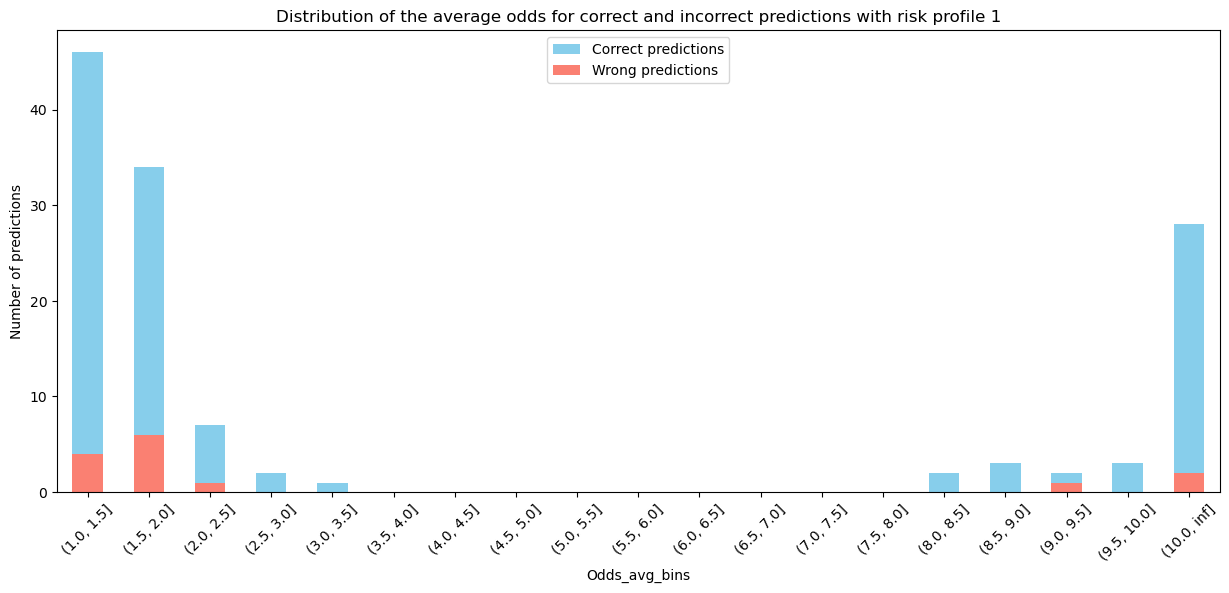

In [67]:
# Putting the winning and losing odds int bins and plotting the distribution
bins = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, np.inf]
correct_pred['Odds_avg_bins'] = pd.cut(correct_pred['Odds_avg'], bins)
wrong_pred['Odds_avg_bins'] = pd.cut(wrong_pred['Odds_avg'], bins)

plt.figure(figsize=(15, 6))

# Plotting correct predictions
correct_pred['Odds_avg_bins'].value_counts().sort_index().plot(kind='bar', color='skyblue', label = 'Correct predictions')
plt.title('Distribution of the average odds for correct and incorrect predictions with risk profile 1')
plt.xlabel('Average odds')
plt.ylabel('Number of predictions')
plt.xticks(rotation=45)

# Plotting wrong predictions
wrong_pred['Odds_avg_bins'].value_counts().sort_index().plot(kind='bar', color='salmon', label = 'Wrong predictions')
plt.xticks(rotation=45)
plt.legend(loc='upper center')
plt.show()

##### Risk Profile 2

In [68]:
# Testing the function with risk profile 1 - Suggesting only predictions with a probability of 75% or higher. Safest option
score, risk2_pred = Random_Forest_Pred(risk_profile=2)

Accuracy for the selected date range with a risk profile of 2: 0.8823529411764706


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13596,Sassuolo,Genoa,2022-01-06,D,H,0.83
13598,AC Milan,Roma,2022-01-06,H,H,0.82
13600,Bordeaux,Marseille,2022-01-07,A,A,0.86
13609,Real Madrid,Valencia,2022-01-08,H,H,0.92
13601,Real Sociedad,Celta Vigo,2022-01-08,H,H,0.77
13603,RB Leipzig,Mainz 05,2022-01-08,H,H,0.92
13606,Hoffenheim,Augsburg,2022-01-08,H,H,0.90
13608,Freiburg,Arminia Bielefeld,2022-01-08,D,H,0.71
13618,Udinese,Atalanta,2022-01-09,A,A,0.92
13617,Venezia,AC Milan,2022-01-09,A,A,0.92


Accuracy for the selected date range with a risk profile of 2: 0.9047619047619048


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13637,Nice,Nantes,2022-01-14,H,H,0.92
13638,Borussia Dortmund,Freiburg,2022-01-14,H,H,0.73
13644,Wolfsburg,Hertha Berlin,2022-01-15,D,H,0.89
13642,VfB Stuttgart,RB Leipzig,2022-01-15,A,A,0.68
13645,Union Berlin,Hoffenheim,2022-01-15,H,H,0.73
13646,Borussia M.Gladbach,Bayer Leverkusen,2022-01-15,A,A,0.67
13654,Salernitana,Lazio,2022-01-15,A,A,0.84
13652,FC Cologne,Bayern Munich,2022-01-15,A,A,0.92
13651,Paris Saint Germain,Brest,2022-01-15,H,H,0.76
13659,Augsburg,Eintracht Frankfurt,2022-01-16,D,A,0.70


Accuracy for the selected date range with a risk profile of 2: 0.7058823529411765


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13688,Verona,Bologna,2022-01-21,H,H,0.72
13689,Espanyol,Real Betis,2022-01-21,A,A,0.76
13687,Lyon,Saint-Etienne,2022-01-21,H,H,0.88
13695,Inter,Venezia,2022-01-22,H,H,0.90
13692,Southampton,Manchester City,2022-01-22,D,A,0.65
13701,Bayer Leverkusen,Augsburg,2022-01-22,H,H,0.90
13709,Atletico Madrid,Valencia,2022-01-22,H,H,0.71
13719,Napoli,Salernitana,2022-01-23,H,H,0.95
13716,Arsenal,Burnley,2022-01-23,D,H,0.70
13711,Hertha Berlin,Bayern Munich,2022-01-23,A,A,0.95


No predicted match is available for the selected risk profile
Accuracy for the selected date range with a risk profile of 2: 0.8888888888888888


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13737,Marseille,Angers,2022-02-04,H,H,0.90
13739,Getafe,Levante,2022-02-04,H,H,0.69
13745,Monaco,Lyon,2022-02-05,H,H,0.77
13743,Mallorca,Cadiz,2022-02-05,H,H,0.68
13751,Fiorentina,Lazio,2022-02-05,A,A,0.71
13752,VfB Stuttgart,Eintracht Frankfurt,2022-02-05,A,H,0.69
13763,Lorient,Lens,2022-02-06,H,H,0.71
13765,Wolfsburg,Greuther Fuerth,2022-02-06,H,H,0.68
13759,Bologna,Empoli,2022-02-06,D,A,0.69
13761,Venezia,Napoli,2022-02-06,A,A,0.90


Accuracy for the selected date range with a risk profile of 2: 0.7037037037037037


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13784,Liverpool,Leicester,2022-02-10,H,H,0.82
13786,Sevilla,Elche,2022-02-11,H,H,0.68
13795,Freiburg,Mainz 05,2022-02-12,D,A,0.66
13794,Villarreal,Real Madrid,2022-02-12,D,A,0.80
13792,Lyon,Nice,2022-02-12,H,H,0.85
13791,Watford,Brighton,2022-02-12,A,A,0.76
13793,Atletico Madrid,Getafe,2022-02-12,H,H,0.66
13800,Rayo Vallecano,Osasuna,2022-02-12,A,A,0.75
13804,Everton,Leeds,2022-02-12,H,H,0.79
13808,Lazio,Bologna,2022-02-12,H,H,0.85


Accuracy for the selected date range with a risk profile of 2: 0.8888888888888888


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13836,Elche,Rayo Vallecano,2022-02-18,H,H,0.77
13842,Liverpool,Norwich,2022-02-19,H,H,0.94
13841,Southampton,Everton,2022-02-19,H,H,0.86
13850,Granada,Villarreal,2022-02-19,A,A,0.81
13856,Nantes,Paris Saint Germain,2022-02-19,H,A,0.65
13852,Real Madrid,Alaves,2022-02-19,H,H,0.97
13851,FC Cologne,Eintracht Frankfurt,2022-02-19,H,H,0.66
13855,Salernitana,AC Milan,2022-02-19,D,A,0.78
13854,Augsburg,Freiburg,2022-02-19,A,A,0.74
13868,Borussia Dortmund,Borussia M.Gladbach,2022-02-20,H,H,0.91


Accuracy for the selected date range with a risk profile of 2: 0.9230769230769231


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13891,Southampton,Norwich,2022-02-25,H,H,0.76
13892,Levante,Elche,2022-02-25,H,H,0.70
13893,Montpellier,Rennes,2022-02-25,A,A,0.75
13901,Eintracht Frankfurt,Bayern Munich,2022-02-26,A,A,0.72
13903,Empoli,Juventus,2022-02-26,A,A,0.78
13900,Freiburg,Hertha Berlin,2022-02-26,H,H,0.76
13908,Brentford,Newcastle United,2022-02-26,A,A,0.68
13896,Bayer Leverkusen,Arminia Bielefeld,2022-02-26,H,H,0.98
13905,Leeds,Tottenham,2022-02-26,A,A,0.74
13899,Rayo Vallecano,Real Madrid,2022-02-26,A,A,0.73


Accuracy for the selected date range with a risk profile of 2: 0.8620689655172413


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13946,Udinese,Sampdoria,2022-03-05,H,H,0.77
13950,Cagliari,Lazio,2022-03-05,A,A,0.87
13947,Lens,Brest,2022-03-05,A,H,0.81
13942,Bochum,Greuther Fuerth,2022-03-05,H,H,0.71
13943,Hertha Berlin,Eintracht Frankfurt,2022-03-05,A,A,0.67
13962,Valencia,Granada,2022-03-05,H,H,0.72
13954,Aston Villa,Southampton,2022-03-05,H,H,0.79
13957,Burnley,Chelsea,2022-03-05,A,A,0.87
13956,Real Madrid,Real Sociedad,2022-03-05,H,H,0.80
13960,Liverpool,West Ham,2022-03-05,H,H,0.70


Accuracy for the selected date range with a risk profile of 2: 0.8076923076923077


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
14018,Real Sociedad,Alaves,2022-03-13,H,H,0.96
14010,Arsenal,Leicester,2022-03-13,H,H,0.92
14013,Barcelona,Osasuna,2022-03-13,H,H,0.92
14012,Fiorentina,Bologna,2022-03-13,H,H,0.70
14011,Leeds,Norwich,2022-03-13,H,H,0.79
14019,Greuther Fuerth,RB Leipzig,2022-03-13,A,A,0.93
14024,Verona,Napoli,2022-03-13,A,A,0.70
14023,Borussia Dortmund,Arminia Bielefeld,2022-03-13,H,H,0.81
14032,Brest,Marseille,2022-03-13,A,A,0.85
14026,Paris Saint Germain,Bordeaux,2022-03-13,H,H,0.95


Accuracy for the selected date range with a risk profile of 2: 0.8636363636363636


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
14088,Freiburg,Bayern Munich,2022-04-02,A,A,0.86
14091,Liverpool,Watford,2022-04-02,H,H,0.75
14092,Brighton,Norwich,2022-04-02,D,H,0.71
14093,Burnley,Manchester City,2022-04-02,A,A,0.84
14095,Atletico Madrid,Alaves,2022-04-02,H,H,0.98
14107,Bayer Leverkusen,Hertha Berlin,2022-04-02,H,H,0.76
14101,Lille,Bordeaux,2022-04-02,D,H,0.91
14103,Arminia Bielefeld,VfB Stuttgart,2022-04-02,D,A,0.76
14104,Celta Vigo,Real Madrid,2022-04-02,A,A,0.72
14113,Strasbourg,Lens,2022-04-03,H,H,0.68


Accuracy for the overall test data with a risk profile of 2: 0.8416289592760181 



In [69]:
# Calculating the share of predicted matches
share_risk2 = round(((risk2_pred.shape[0] / all_leagues_test.shape[0]) * 100),2)
print('Using a risk profile = 2, i.e. the safest option, we will suggest to the customer to bet on just {}% of the games'.format(share_risk2))

Using a risk profile = 2, i.e. the safest option, we will suggest to the customer to bet on just 24.21% of the games


In [70]:
odds = all_leagues_test.loc[risk2_pred.index, ['HomeTeam','AwayTeam','Date','B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 
                                                'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']]
risk2_pred = pd.merge(risk2_pred, odds, left_index=True, right_index=True)

In [71]:
# Selecting the winning predictions and calculating the avg odd
correct_pred = risk2_pred[risk2_pred['Actual Result'] == risk2_pred['Predicted Result']].copy()
correct_pred['Odds_avg'] = correct_pred.apply(lambda x: (x['B365H']+x['BWH']+x['IWH']+x['PSH']+x['WHH']+x['VCH']+x['PSCH'])/7
                                            if x['Predicted Result'] == 'H' else x['B365D']+x['BWD']+x['IWD']+x['PSD']+x['WHD']+x['VCD']+x['PSCD']
                                            if x['Predicted Result'] == 'D' else x['B365A']+x['BWA']+x['IWA']+x['PSA']+x['WHA']+x['VCA']+x['PSCA'], axis=1)
correct_pred.drop(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
                    'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'], axis=1, inplace=True)

# Selecting the loosing predictions and calculating the avg odd
wrong_pred = risk2_pred[risk2_pred['Actual Result'] != risk2_pred['Predicted Result']].copy()
wrong_pred['Odds_avg'] = wrong_pred.apply(lambda x: (x['B365H']+x['BWH']+x['IWH']+x['PSH']+x['WHH']+x['VCH']+x['PSCH'])/7
                                            if x['Predicted Result'] == 'H' else x['B365D']+x['BWD']+x['IWD']+x['PSD']+x['WHD']+x['VCD']+x['PSCD']
                                            if x['Predicted Result'] == 'D' else x['B365A']+x['BWA']+x['IWA']+x['PSA']+x['WHA']+x['VCA']+x['PSCA'], axis=1)
wrong_pred.drop(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
                    'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'], axis=1, inplace=True)

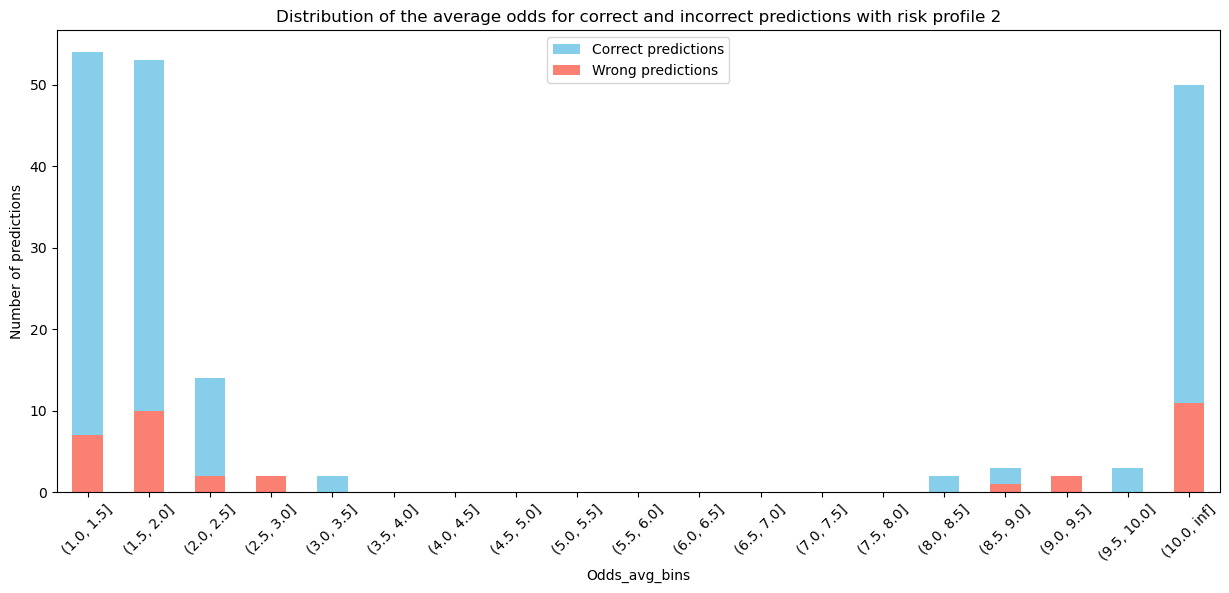

In [72]:
# Putting the winning and losing odds int bins and plotting the distribution
bins = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, np.inf]
correct_pred['Odds_avg_bins'] = pd.cut(correct_pred['Odds_avg'], bins)
wrong_pred['Odds_avg_bins'] = pd.cut(wrong_pred['Odds_avg'], bins)

plt.figure(figsize=(15, 6))

# Plotting correct predictions
correct_pred['Odds_avg_bins'].value_counts().sort_index().plot(kind='bar', color='skyblue', label = 'Correct predictions')
plt.title('Distribution of the average odds for correct and incorrect predictions with risk profile 2')
plt.xlabel('Average odds')
plt.ylabel('Number of predictions')
plt.xticks(rotation=45)

# Plotting wrong predictions
wrong_pred['Odds_avg_bins'].value_counts().sort_index().plot(kind='bar', color='salmon', label = 'Wrong predictions')
plt.xticks(rotation=45)
plt.legend(loc = 'upper center')
plt.show()

##### Risk Profile 3

In [73]:
# Testing the function with risk profile 1 - Suggesting only predictions with a probability of 75% or higher. Safest option
score, risk3_pred = Random_Forest_Pred(risk_profile=3)

Accuracy for the selected date range with a risk profile of 3: 0.9047619047619048


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13594,Spezia,Verona,2022-01-06,A,A,0.57
13595,Sampdoria,Cagliari,2022-01-06,A,A,0.56
13596,Sassuolo,Genoa,2022-01-06,D,H,0.76
13598,AC Milan,Roma,2022-01-06,H,H,0.79
13600,Bordeaux,Marseille,2022-01-07,A,A,0.88
13609,Real Madrid,Valencia,2022-01-08,H,H,0.88
13601,Real Sociedad,Celta Vigo,2022-01-08,H,H,0.76
13603,RB Leipzig,Mainz 05,2022-01-08,H,H,0.92
13606,Hoffenheim,Augsburg,2022-01-08,H,H,0.92
13608,Freiburg,Arminia Bielefeld,2022-01-08,D,H,0.71


Accuracy for the selected date range with a risk profile of 3: 0.8518518518518519


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13637,Nice,Nantes,2022-01-14,H,H,0.94
13638,Borussia Dortmund,Freiburg,2022-01-14,H,H,0.68
13644,Wolfsburg,Hertha Berlin,2022-01-15,D,H,0.76
13643,Aston Villa,Manchester United,2022-01-15,D,H,0.55
13642,VfB Stuttgart,RB Leipzig,2022-01-15,A,A,0.70
13645,Union Berlin,Hoffenheim,2022-01-15,H,H,0.66
13647,Wolverhampton Wanderers,Southampton,2022-01-15,H,H,0.63
13646,Borussia M.Gladbach,Bayer Leverkusen,2022-01-15,A,A,0.66
13654,Salernitana,Lazio,2022-01-15,A,A,0.92
13652,FC Cologne,Bayern Munich,2022-01-15,A,A,0.92


Accuracy for the selected date range with a risk profile of 3: 0.7391304347826086


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13688,Verona,Bologna,2022-01-21,H,H,0.71
13689,Espanyol,Real Betis,2022-01-21,A,A,0.74
13687,Lyon,Saint-Etienne,2022-01-21,H,H,0.85
13697,Lens,Marseille,2022-01-22,A,A,0.58
13695,Inter,Venezia,2022-01-22,H,H,0.92
13692,Southampton,Manchester City,2022-01-22,D,A,0.58
13691,Manchester United,West Ham,2022-01-22,H,H,0.65
13701,Bayer Leverkusen,Augsburg,2022-01-22,H,H,0.91
13707,Villarreal,Mallorca,2022-01-22,H,H,0.56
13709,Atletico Madrid,Valencia,2022-01-22,H,H,0.75


No predicted match is available for the selected risk profile
Accuracy for the selected date range with a risk profile of 3: 0.8333333333333334


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13737,Marseille,Angers,2022-02-04,H,H,0.90
13739,Getafe,Levante,2022-02-04,H,H,0.78
13745,Monaco,Lyon,2022-02-05,H,H,0.77
13743,Mallorca,Cadiz,2022-02-05,H,H,0.70
13751,Fiorentina,Lazio,2022-02-05,A,A,0.72
13752,VfB Stuttgart,Eintracht Frankfurt,2022-02-05,A,H,0.60
13753,Bayern Munich,RB Leipzig,2022-02-05,H,H,0.56
13763,Lorient,Lens,2022-02-06,H,H,0.74
13765,Wolfsburg,Greuther Fuerth,2022-02-06,H,H,0.65
13759,Bologna,Empoli,2022-02-06,D,A,0.70


Accuracy for the selected date range with a risk profile of 3: 0.7368421052631579


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13784,Liverpool,Leicester,2022-02-10,H,H,0.81
13785,Wolverhampton Wanderers,Arsenal,2022-02-10,A,A,0.62
13786,Sevilla,Elche,2022-02-11,H,H,0.72
13787,RB Leipzig,FC Cologne,2022-02-11,H,H,0.61
13796,Eintracht Frankfurt,Wolfsburg,2022-02-12,A,A,0.67
13795,Freiburg,Mainz 05,2022-02-12,D,A,0.71
13794,Villarreal,Real Madrid,2022-02-12,D,A,0.77
13790,Montpellier,Lille,2022-02-12,A,A,0.62
13792,Lyon,Nice,2022-02-12,H,H,0.82
13791,Watford,Brighton,2022-02-12,A,A,0.66


Accuracy for the selected date range with a risk profile of 3: 0.875


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13836,Elche,Rayo Vallecano,2022-02-18,H,H,0.71
13842,Liverpool,Norwich,2022-02-19,H,H,0.93
13841,Southampton,Everton,2022-02-19,H,H,0.85
13850,Granada,Villarreal,2022-02-19,A,A,0.78
13856,Nantes,Paris Saint Germain,2022-02-19,H,A,0.59
13852,Real Madrid,Alaves,2022-02-19,H,H,0.94
13851,FC Cologne,Eintracht Frankfurt,2022-02-19,H,H,0.67
13855,Salernitana,AC Milan,2022-02-19,D,A,0.67
13854,Augsburg,Freiburg,2022-02-19,A,A,0.73
13853,Arminia Bielefeld,Union Berlin,2022-02-19,H,H,0.60


Accuracy for the selected date range with a risk profile of 3: 0.8666666666666667


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13891,Southampton,Norwich,2022-02-25,H,H,0.84
13892,Levante,Elche,2022-02-25,H,H,0.64
13893,Montpellier,Rennes,2022-02-25,A,A,0.74
13901,Eintracht Frankfurt,Bayern Munich,2022-02-26,A,A,0.62
13903,Empoli,Juventus,2022-02-26,A,A,0.69
13900,Freiburg,Hertha Berlin,2022-02-26,H,H,0.68
13908,Brentford,Newcastle United,2022-02-26,A,A,0.65
13896,Bayer Leverkusen,Arminia Bielefeld,2022-02-26,H,H,0.98
13905,Leeds,Tottenham,2022-02-26,A,A,0.68
13899,Rayo Vallecano,Real Madrid,2022-02-26,A,A,0.60


Accuracy for the selected date range with a risk profile of 3: 0.8918918918918919


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13946,Udinese,Sampdoria,2022-03-05,H,H,0.77
13950,Cagliari,Lazio,2022-03-05,A,A,0.92
13947,Lens,Brest,2022-03-05,A,H,0.72
13942,Bochum,Greuther Fuerth,2022-03-05,H,H,0.66
13943,Hertha Berlin,Eintracht Frankfurt,2022-03-05,A,A,0.63
13955,Wolverhampton Wanderers,Crystal Palace,2022-03-05,A,A,0.71
13953,Osasuna,Villarreal,2022-03-05,H,H,0.55
13963,Norwich,Brentford,2022-03-05,A,A,0.59
13962,Valencia,Granada,2022-03-05,H,H,0.85
13954,Aston Villa,Southampton,2022-03-05,H,H,0.75


Accuracy for the selected date range with a risk profile of 3: 0.8048780487804879


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
14018,Real Sociedad,Alaves,2022-03-13,H,H,0.95
14017,Real Betis,Athletic Club,2022-03-13,H,H,0.56
14015,Chelsea,Newcastle United,2022-03-13,H,H,0.61
14010,Arsenal,Leicester,2022-03-13,H,H,0.91
14013,Barcelona,Osasuna,2022-03-13,H,H,0.91
14012,Fiorentina,Bologna,2022-03-13,H,H,0.71
14011,Leeds,Norwich,2022-03-13,H,H,0.75
14009,West Ham,Aston Villa,2022-03-13,H,H,0.58
14019,Greuther Fuerth,RB Leipzig,2022-03-13,A,A,0.96
14031,Lyon,Rennes,2022-03-13,A,A,0.56


Accuracy for the selected date range with a risk profile of 3: 0.84375


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
14085,Union Berlin,FC Cologne,2022-04-01,H,H,0.71
14096,Hoffenheim,Bochum,2022-04-02,A,H,0.62
14087,Getafe,Mallorca,2022-04-02,H,H,0.56
14088,Freiburg,Bayern Munich,2022-04-02,A,A,0.90
14089,Lazio,Sassuolo,2022-04-02,H,H,0.65
14091,Liverpool,Watford,2022-04-02,H,H,0.68
14092,Brighton,Norwich,2022-04-02,D,H,0.66
14093,Burnley,Manchester City,2022-04-02,A,A,0.82
14095,Atletico Madrid,Alaves,2022-04-02,H,H,0.94
14086,Salernitana,Torino,2022-04-02,A,A,0.58


Accuracy for the overall test data with a risk profile of 3: 0.8316498316498316 



In [74]:
# Calculating the share of predicted matches
share_risk3 = round(((risk3_pred.shape[0] / all_leagues_test.shape[0]) * 100),2)
print('Using a risk profile = 3, i.e. the safest option, we will suggest to the customer to bet on just {}% of the games'.format(share_risk3))

Using a risk profile = 3, i.e. the safest option, we will suggest to the customer to bet on just 32.53% of the games


In [75]:
odds = all_leagues_test.loc[risk3_pred.index, ['HomeTeam','AwayTeam','Date','B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 
                                                'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']]
risk3_pred = pd.merge(risk3_pred, odds, left_index=True, right_index=True)

In [76]:
# Selecting the winning predictions and calculating the avg odd
correct_pred = risk3_pred[risk3_pred['Actual Result'] == risk3_pred['Predicted Result']].copy()
correct_pred['Odds_avg'] = correct_pred.apply(lambda x: (x['B365H']+x['BWH']+x['IWH']+x['PSH']+x['WHH']+x['VCH']+x['PSCH'])/7
                                            if x['Predicted Result'] == 'H' else x['B365D']+x['BWD']+x['IWD']+x['PSD']+x['WHD']+x['VCD']+x['PSCD']
                                            if x['Predicted Result'] == 'D' else x['B365A']+x['BWA']+x['IWA']+x['PSA']+x['WHA']+x['VCA']+x['PSCA'], axis=1)
correct_pred.drop(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
                    'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'], axis=1, inplace=True)

# Selecting the loosing predictions and calculating the avg odd
wrong_pred = risk3_pred[risk3_pred['Actual Result'] != risk3_pred['Predicted Result']].copy()
wrong_pred['Odds_avg'] = wrong_pred.apply(lambda x: (x['B365H']+x['BWH']+x['IWH']+x['PSH']+x['WHH']+x['VCH']+x['PSCH'])/7
                                            if x['Predicted Result'] == 'H' else x['B365D']+x['BWD']+x['IWD']+x['PSD']+x['WHD']+x['VCD']+x['PSCD']
                                            if x['Predicted Result'] == 'D' else x['B365A']+x['BWA']+x['IWA']+x['PSA']+x['WHA']+x['VCA']+x['PSCA'], axis=1)
wrong_pred.drop(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
                    'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'], axis=1, inplace=True)

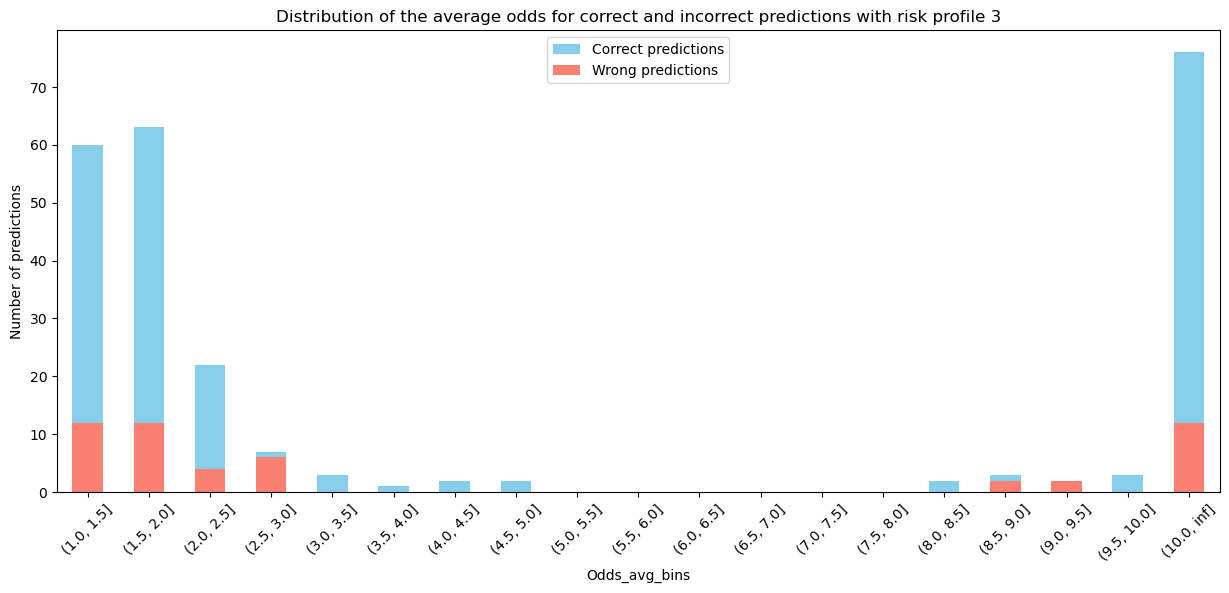

In [77]:
# Putting the winning and losing odds int bins and plotting the distribution
bins = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, np.inf]
correct_pred['Odds_avg_bins'] = pd.cut(correct_pred['Odds_avg'], bins)
wrong_pred['Odds_avg_bins'] = pd.cut(wrong_pred['Odds_avg'], bins)

plt.figure(figsize=(15, 6))

# Plotting correct predictions
correct_pred['Odds_avg_bins'].value_counts().sort_index().plot(kind='bar', color='skyblue', label = 'Correct predictions')
plt.title('Distribution of the average odds for correct and incorrect predictions with risk profile 3')
plt.xlabel('Average odds')
plt.ylabel('Number of predictions')
plt.xticks(rotation=45)

# Plotting wrong predictions
wrong_pred['Odds_avg_bins'].value_counts().sort_index().plot(kind='bar', color='salmon', label = 'Wrong predictions')
plt.xticks(rotation=45)
plt.legend(loc = 'upper center')
plt.show()

## Multiclass boosted decision tree

In [78]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def XGBModel(risk_profile, features=features, features_test=features_test, all_leagues_test=all_leagues_test, num_weeks=12):
    predictions_all = pd.DataFrame()

    for i in range(num_weeks):
        # Initialize training data
        X_train = features.drop(columns=['Weight', 'FTR', 'Date'])
        y_train = features['FTR']

        """
        Defining the conditions to update the last_date variable: If we are at the first iteration the last date is the last date of the train data, 
        if the test data is empty the last date is the last date of the data_range, to make sure the next interval would be different from the current one
        otherwise the last date is the last date of the train data + 1 day, to avoid iterations over the same fixtures.
        """
        
        if i == 0:
            last_date = features['Date'].max()
        elif  X_test.shape[0] == 0:
            last_date = date_range[-1] 
        else:
            last_date = features['Date'].max() + pd.Timedelta(days=1)
        
        date_range = pd.date_range(start=last_date, end=last_date + pd.Timedelta(weeks=1))

        # Printing the date range to check if the conditions are working as expected - Debugging purposes
        print(date_range)
        
        X_test = features_test[features_test['Date'].isin(date_range)].drop(columns=['Weight', 'FTR', 'Date'])
        y_test = features_test[features_test['Date'].isin(date_range)]['FTR']
# occhio agli indici 
       
        # Correctly initialize weights after determining valid_indices
        

        if X_test.shape[0] == 0:
            continue
        
        weights = features['Weight'].astype(float).values


        """
        From here on you should modify adding ur model of choice, the model should be fitted on the train data and then used to predict the test data
        Use the probability of the predictions to select the class with the highest probability and store the results in a dataframe
        """

        model = XGBClassifier()

        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)

        model.fit(X_train, y_train_encoded, sample_weight=weights)

         # Predicting the probabilities for each class of the test data
        y_pred = model.predict_proba(X_test)

        # Selecting the class predicted with a higher probability
        y_pred_class_idx = y_pred.argmax(axis=1)

        # Mapping the predicted classes (0:A, 1:D, 2:H) to allow for accuracy estimates
        class_map = {0: 'A', 1: 'D', 2: 'H'}

        # Mapping the predicted class indices to class labels
        y_pred_class = [class_map[idx] for idx in y_pred_class_idx]

        # Selecting the probability
        y_proba = y_pred.max(axis=1)
        """
        From here on you should be able to leave the code as it is
        """

        
        
         # Selecting the two teams that took part in the match using the index of the test data
        teams = all_leagues_test.loc[X_test.index, ['HomeTeam', 'AwayTeam']]
        dates = all_leagues_test.loc[X_test.index, 'Date']

        # Storing the predicted class alongside the actual class in a pandas dataframe
        predictions_data = {'HomeTeam': teams['HomeTeam'],'AwayTeam': teams['AwayTeam'],
                        'Date': dates,'Actual Result' : y_test, 'Predicted Result' : y_pred_class, 'Probability': y_proba}
        predictions = pd.DataFrame(data = predictions_data)

        # Adding the risk_profile to the predictions
        if risk_profile == 1:
            predictions = predictions[predictions['Probability'] >= 0.75]

        elif risk_profile == 2:
            predictions = predictions[predictions['Probability'] >= 0.65]

        elif risk_profile == 3:
            predictions = predictions[predictions['Probability'] >= 0.55]
                
        else:
            print('Invalid risk profile')

        # Storing all the predictions in a dataframe to analyze the results later 
        predictions_all = pd.concat([predictions_all, predictions])

        # Calculating the overall accuracy
        accuracy_all = accuracy_score(predictions_all['Actual Result'], predictions_all['Predicted Result'])

        # Adding the actual results to the train data
        features = pd.concat([features, features_test[features_test['Date'].isin(date_range)]])

        #"""
        #Lines used for debugging purposes, we could also show this as the use case for the customer to see the predictions for each week, might get too crowded though:
        # Skipping to the next iteration if there are no matches to suggest for the current risk profile
        if predictions.shape[0] == 0:
            print('No predicted match is available for the selected risk profile') #- Debugging purposes
            continue
        # Printing the accuracy of the model for each date range
        accuracy = accuracy_score(predictions['Actual Result'], predictions['Predicted Result'])

        print('Accuracy for the selected date range with a risk profile of {}: {}'.format(risk_profile, accuracy))

        # Displaying the predictions for each date range - This is what we would use to give out predictions to customers, week by week
        display(predictions)
        #"""
    return print('Accuracy for the overall test data with a risk profile of {}: {} \n'.format(risk_profile, accuracy_all)), predictions_all

#### Evaluation of the model

##### Risk Profile 1

In [79]:
# Testing the function with risk profile 1 - Suggesting only predictions with a probability of 75% or higher. Safest option
score, risk1_pred = XGBModel(risk_profile=1)

DatetimeIndex(['2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09',
               '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 1: 0.7619047619047619


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13596,Sassuolo,Genoa,2022-01-06,D,H,0.827302
13598,AC Milan,Roma,2022-01-06,H,H,0.853166
13599,Bayern Munich,Borussia M.Gladbach,2022-01-07,A,H,0.812913
13609,Real Madrid,Valencia,2022-01-08,H,H,0.937606
13601,Real Sociedad,Celta Vigo,2022-01-08,H,H,0.865235
13603,RB Leipzig,Mainz 05,2022-01-08,H,H,0.995883
13604,Granada,Barcelona,2022-01-08,D,H,0.801608
13606,Hoffenheim,Augsburg,2022-01-08,H,H,0.982749
13608,Freiburg,Arminia Bielefeld,2022-01-08,D,H,0.870325
13618,Udinese,Atalanta,2022-01-09,A,A,0.919362


DatetimeIndex(['2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 1: 0.875


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13637,Nice,Nantes,2022-01-14,H,H,0.978234
13644,Wolfsburg,Hertha Berlin,2022-01-15,D,H,0.916019
13643,Aston Villa,Manchester United,2022-01-15,D,H,0.872752
13642,VfB Stuttgart,RB Leipzig,2022-01-15,A,A,0.892600
13645,Union Berlin,Hoffenheim,2022-01-15,H,H,0.927099
13640,Manchester City,Chelsea,2022-01-15,H,H,0.889170
13647,Wolverhampton Wanderers,Southampton,2022-01-15,H,H,0.860755
13646,Borussia M.Gladbach,Bayer Leverkusen,2022-01-15,A,A,0.981302
13654,Salernitana,Lazio,2022-01-15,A,A,0.992980
13652,FC Cologne,Bayern Munich,2022-01-15,A,A,0.986328


DatetimeIndex(['2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 1: 0.75


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13689,Espanyol,Real Betis,2022-01-21,A,A,0.950510
13687,Lyon,Saint-Etienne,2022-01-21,H,H,0.945713
13690,Eintracht Frankfurt,Arminia Bielefeld,2022-01-21,A,A,0.883801
13695,Inter,Venezia,2022-01-22,H,H,0.962291
13698,Genoa,Udinese,2022-01-22,D,D,0.920530
13701,Bayer Leverkusen,Augsburg,2022-01-22,H,H,0.994953
13702,Hoffenheim,Borussia Dortmund,2022-01-22,A,A,0.778649
13719,Napoli,Salernitana,2022-01-23,H,H,0.976166
13711,Hertha Berlin,Bayern Munich,2022-01-23,A,A,0.995560
13714,Empoli,Roma,2022-01-23,A,A,0.920759


DatetimeIndex(['2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30',
               '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 1: 1.0


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13736,Lyon,Marseille,2022-02-01,H,H,0.834007


DatetimeIndex(['2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
               '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 1: 0.8


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13737,Marseille,Angers,2022-02-04,H,H,0.909220
13739,Getafe,Levante,2022-02-04,H,H,0.955975
13745,Monaco,Lyon,2022-02-05,H,H,0.857413
13751,Fiorentina,Lazio,2022-02-05,A,A,0.912277
13752,VfB Stuttgart,Eintracht Frankfurt,2022-02-05,A,H,0.837485
13763,Lorient,Lens,2022-02-06,H,H,0.927274
13765,Wolfsburg,Greuther Fuerth,2022-02-06,H,H,0.873472
13758,Atalanta,Cagliari,2022-02-06,A,A,0.909107
13759,Bologna,Empoli,2022-02-06,D,A,0.863872
13760,Sampdoria,Sassuolo,2022-02-06,H,H,0.767503


DatetimeIndex(['2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 1: 0.8148148148148148


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13784,Liverpool,Leicester,2022-02-10,H,H,0.960226
13787,RB Leipzig,FC Cologne,2022-02-11,H,H,0.960251
13796,Eintracht Frankfurt,Wolfsburg,2022-02-12,A,A,0.913187
13794,Villarreal,Real Madrid,2022-02-12,D,A,0.904358
13792,Lyon,Nice,2022-02-12,H,H,0.979471
13791,Watford,Brighton,2022-02-12,A,A,0.756959
13800,Rayo Vallecano,Osasuna,2022-02-12,A,A,0.930980
13804,Everton,Leeds,2022-02-12,H,H,0.988247
13808,Lazio,Bologna,2022-02-12,H,H,0.951794
13807,Brentford,Crystal Palace,2022-02-12,D,H,0.751152


DatetimeIndex(['2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 1: 0.84


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13836,Elche,Rayo Vallecano,2022-02-18,H,H,0.864275
13837,Juventus,Torino,2022-02-18,D,H,0.860326
13838,Lille,Metz,2022-02-18,D,D,0.834012
13843,Crystal Palace,Chelsea,2022-02-19,A,A,0.807936
13842,Liverpool,Norwich,2022-02-19,H,H,0.988397
13841,Southampton,Everton,2022-02-19,H,H,0.980046
13850,Granada,Villarreal,2022-02-19,A,A,0.988186
13845,Aston Villa,Watford,2022-02-19,A,A,0.892971
13856,Nantes,Paris Saint Germain,2022-02-19,H,A,0.832012
13852,Real Madrid,Alaves,2022-02-19,H,H,0.970023


DatetimeIndex(['2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28',
               '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 1: 0.9


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13891,Southampton,Norwich,2022-02-25,H,H,0.960512
13892,Levante,Elche,2022-02-25,H,H,0.803158
13893,Montpellier,Rennes,2022-02-25,A,A,0.927932
13903,Empoli,Juventus,2022-02-26,A,A,0.976855
13900,Freiburg,Hertha Berlin,2022-02-26,H,H,0.959756
13908,Brentford,Newcastle United,2022-02-26,A,A,0.794307
13898,Salernitana,Bologna,2022-02-26,D,D,0.821955
13896,Bayer Leverkusen,Arminia Bielefeld,2022-02-26,H,H,0.993019
13905,Leeds,Tottenham,2022-02-26,A,A,0.969097
13899,Rayo Vallecano,Real Madrid,2022-02-26,A,A,0.845453


DatetimeIndex(['2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 1: 0.9393939393939394


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13950,Cagliari,Lazio,2022-03-05,A,A,0.927564
13947,Lens,Brest,2022-03-05,A,H,0.782100
13942,Bochum,Greuther Fuerth,2022-03-05,H,H,0.949497
13943,Hertha Berlin,Eintracht Frankfurt,2022-03-05,A,A,0.947329
13948,Nice,Paris Saint Germain,2022-03-05,H,H,0.780872
13955,Wolverhampton Wanderers,Crystal Palace,2022-03-05,A,A,0.939473
13963,Norwich,Brentford,2022-03-05,A,A,0.928805
13962,Valencia,Granada,2022-03-05,H,H,0.980206
13954,Aston Villa,Southampton,2022-03-05,H,H,0.979516
13957,Burnley,Chelsea,2022-03-05,A,A,0.985988


DatetimeIndex(['2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 1: 0.7777777777777778


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
14018,Real Sociedad,Alaves,2022-03-13,H,H,0.963492
14015,Chelsea,Newcastle United,2022-03-13,H,D,0.763561
14010,Arsenal,Leicester,2022-03-13,H,H,0.991588
14013,Barcelona,Osasuna,2022-03-13,H,H,0.970709
14012,Fiorentina,Bologna,2022-03-13,H,H,0.938652
14011,Leeds,Norwich,2022-03-13,H,H,0.858405
14019,Greuther Fuerth,RB Leipzig,2022-03-13,A,A,0.991971
14016,Rayo Vallecano,Sevilla,2022-03-13,D,D,0.856378
14031,Lyon,Rennes,2022-03-13,A,A,0.895443
14023,Borussia Dortmund,Arminia Bielefeld,2022-03-13,H,H,0.775547


DatetimeIndex(['2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 1: 0.8387096774193549


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
14085,Union Berlin,FC Cologne,2022-04-01,H,H,0.887064
14096,Hoffenheim,Bochum,2022-04-02,A,H,0.935683
14088,Freiburg,Bayern Munich,2022-04-02,A,A,0.965019
14091,Liverpool,Watford,2022-04-02,H,H,0.872034
14092,Brighton,Norwich,2022-04-02,D,D,0.870158
14093,Burnley,Manchester City,2022-04-02,A,A,0.971026
14094,Borussia Dortmund,RB Leipzig,2022-04-02,A,A,0.906719
14095,Atletico Madrid,Alaves,2022-04-02,H,H,0.997087
14086,Salernitana,Torino,2022-04-02,A,A,0.850306
14107,Bayer Leverkusen,Hertha Berlin,2022-04-02,H,H,0.757068


Accuracy for the overall test data with a risk profile of 1: 0.8371212121212122 



In [80]:
# Calculating the share of predicted matches
share_risk1 = round(((risk1_pred.shape[0] / all_leagues_test.shape[0]) * 100),2)
print('Using a risk profile = 1, i.e. the safest option, we will suggest to the customer to bet on just {}% of the games'.format(share_risk1))

Using a risk profile = 1, i.e. the safest option, we will suggest to the customer to bet on just 28.92% of the games


In [81]:
odds = all_leagues_test.loc[risk1_pred.index, ['HomeTeam','AwayTeam','Date','B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 
                                                'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']]
risk1_pred = pd.merge(risk1_pred, odds, left_index=True, right_index=True)

In [82]:
# Selecting the winning predictions and calculating the avg odd
correct_pred = risk1_pred[risk1_pred['Actual Result'] == risk1_pred['Predicted Result']].copy()
correct_pred['Odds_avg'] = correct_pred.apply(lambda x: (x['B365H']+x['BWH']+x['IWH']+x['PSH']+x['WHH']+x['VCH']+x['PSCH'])/7
                                            if x['Predicted Result'] == 'H' else x['B365D']+x['BWD']+x['IWD']+x['PSD']+x['WHD']+x['VCD']+x['PSCD']
                                            if x['Predicted Result'] == 'D' else x['B365A']+x['BWA']+x['IWA']+x['PSA']+x['WHA']+x['VCA']+x['PSCA'], axis=1)
correct_pred.drop(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
                    'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'], axis=1, inplace=True)

# Selecting the loosing predictions and calculating the avg odd
wrong_pred = risk1_pred[risk1_pred['Actual Result'] != risk1_pred['Predicted Result']].copy()
wrong_pred['Odds_avg'] = wrong_pred.apply(lambda x: (x['B365H']+x['BWH']+x['IWH']+x['PSH']+x['WHH']+x['VCH']+x['PSCH'])/7
                                            if x['Predicted Result'] == 'H' else x['B365D']+x['BWD']+x['IWD']+x['PSD']+x['WHD']+x['VCD']+x['PSCD']
                                            if x['Predicted Result'] == 'D' else x['B365A']+x['BWA']+x['IWA']+x['PSA']+x['WHA']+x['VCA']+x['PSCA'], axis=1)
wrong_pred.drop(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
                    'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'], axis=1, inplace=True)

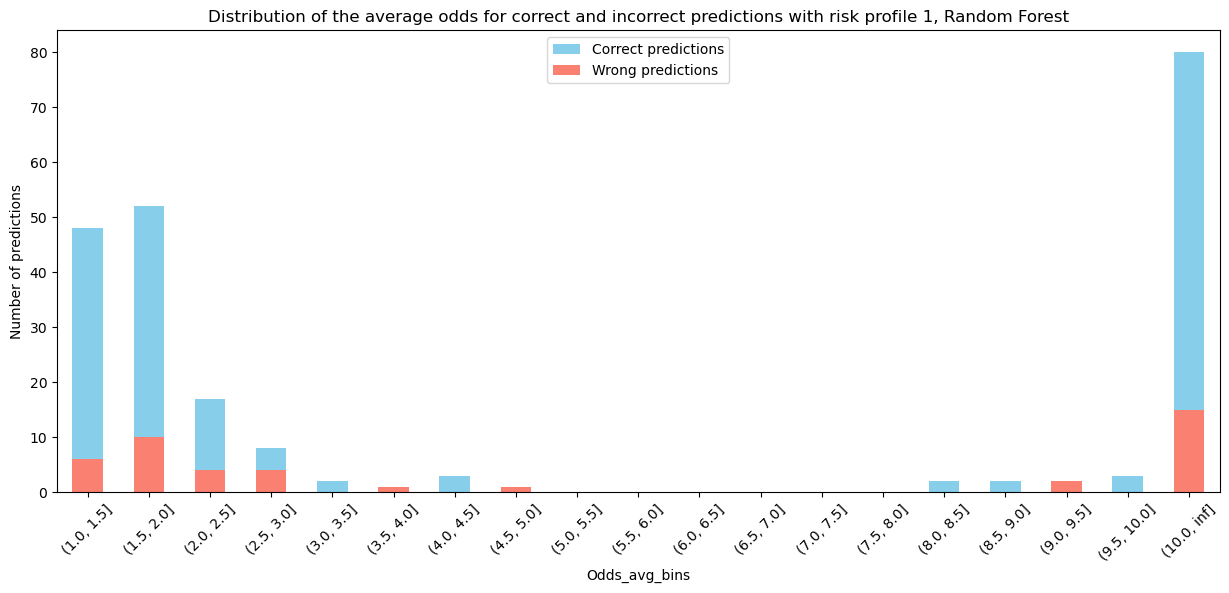

In [83]:
# Putting the winning and losing odds int bins and plotting the distribution
bins = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, np.inf]
correct_pred['Odds_avg_bins'] = pd.cut(correct_pred['Odds_avg'], bins)
wrong_pred['Odds_avg_bins'] = pd.cut(wrong_pred['Odds_avg'], bins)

plt.figure(figsize=(15, 6))

# Plotting correct predictions
correct_pred['Odds_avg_bins'].value_counts().sort_index().plot(kind='bar', color='skyblue', label = 'Correct predictions')
plt.title('Distribution of the average odds for correct and incorrect predictions with risk profile 1, Random Forest')
plt.xlabel('Average odds')
plt.ylabel('Number of predictions')
plt.xticks(rotation=45)

# Plotting wrong predictions
wrong_pred['Odds_avg_bins'].value_counts().sort_index().plot(kind='bar', color='salmon', label = 'Wrong predictions')
plt.xticks(rotation=45)
plt.legend(loc='upper center')
plt.show()

##### Risk Profile 2

In [84]:
# Testing the function with risk profile 2 - Suggesting only predictions with a probability of 75% or higher. Safest option
score, risk2_pred = XGBModel(risk_profile=2)

DatetimeIndex(['2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09',
               '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 2: 0.7391304347826086


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13596,Sassuolo,Genoa,2022-01-06,D,H,0.827302
13598,AC Milan,Roma,2022-01-06,H,H,0.853166
13599,Bayern Munich,Borussia M.Gladbach,2022-01-07,A,H,0.812913
13600,Bordeaux,Marseille,2022-01-07,A,A,0.737544
13609,Real Madrid,Valencia,2022-01-08,H,H,0.937606
13601,Real Sociedad,Celta Vigo,2022-01-08,H,H,0.865235
13603,RB Leipzig,Mainz 05,2022-01-08,H,H,0.995883
13604,Granada,Barcelona,2022-01-08,D,H,0.801608
13606,Hoffenheim,Augsburg,2022-01-08,H,H,0.982749
13608,Freiburg,Arminia Bielefeld,2022-01-08,D,H,0.870325


DatetimeIndex(['2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 2: 0.8846153846153846


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13637,Nice,Nantes,2022-01-14,H,H,0.978234
13644,Wolfsburg,Hertha Berlin,2022-01-15,D,H,0.916019
13643,Aston Villa,Manchester United,2022-01-15,D,H,0.872752
13642,VfB Stuttgart,RB Leipzig,2022-01-15,A,A,0.892600
13645,Union Berlin,Hoffenheim,2022-01-15,H,H,0.927099
13640,Manchester City,Chelsea,2022-01-15,H,H,0.889170
13647,Wolverhampton Wanderers,Southampton,2022-01-15,H,H,0.860755
13646,Borussia M.Gladbach,Bayer Leverkusen,2022-01-15,A,A,0.981302
13654,Salernitana,Lazio,2022-01-15,A,A,0.992980
13652,FC Cologne,Bayern Munich,2022-01-15,A,A,0.986328


DatetimeIndex(['2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 2: 0.7727272727272727


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13688,Verona,Bologna,2022-01-21,H,H,0.713469
13689,Espanyol,Real Betis,2022-01-21,A,A,0.950510
13687,Lyon,Saint-Etienne,2022-01-21,H,H,0.945713
13690,Eintracht Frankfurt,Arminia Bielefeld,2022-01-21,A,A,0.883801
13697,Lens,Marseille,2022-01-22,A,A,0.731905
13695,Inter,Venezia,2022-01-22,H,H,0.962291
13698,Genoa,Udinese,2022-01-22,D,D,0.920530
13700,Everton,Aston Villa,2022-01-22,A,D,0.717859
13701,Bayer Leverkusen,Augsburg,2022-01-22,H,H,0.994953
13702,Hoffenheim,Borussia Dortmund,2022-01-22,A,A,0.778649


DatetimeIndex(['2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30',
               '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 2: 1.0


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13736,Lyon,Marseille,2022-02-01,H,H,0.834007


DatetimeIndex(['2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
               '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 2: 0.8


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13737,Marseille,Angers,2022-02-04,H,H,0.909220
13738,Hertha Berlin,Bochum,2022-02-04,D,A,0.694496
13739,Getafe,Levante,2022-02-04,H,H,0.955975
13745,Monaco,Lyon,2022-02-05,H,H,0.857413
13746,Augsburg,Union Berlin,2022-02-05,H,H,0.705063
13743,Mallorca,Cadiz,2022-02-05,H,H,0.738542
13751,Fiorentina,Lazio,2022-02-05,A,A,0.912277
13752,VfB Stuttgart,Eintracht Frankfurt,2022-02-05,A,H,0.837485
13748,Mainz 05,Hoffenheim,2022-02-05,H,H,0.665042
13763,Lorient,Lens,2022-02-06,H,H,0.927274


DatetimeIndex(['2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 2: 0.7941176470588235


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13784,Liverpool,Leicester,2022-02-10,H,H,0.960226
13787,RB Leipzig,FC Cologne,2022-02-11,H,H,0.960251
13796,Eintracht Frankfurt,Wolfsburg,2022-02-12,A,A,0.913187
13794,Villarreal,Real Madrid,2022-02-12,D,A,0.904358
13790,Montpellier,Lille,2022-02-12,A,A,0.736534
13792,Lyon,Nice,2022-02-12,H,H,0.979471
13791,Watford,Brighton,2022-02-12,A,A,0.756959
13798,Napoli,Inter,2022-02-12,D,H,0.722099
13793,Atletico Madrid,Getafe,2022-02-12,H,H,0.664913
13800,Rayo Vallecano,Osasuna,2022-02-12,A,A,0.930980


DatetimeIndex(['2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 2: 0.78125


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13836,Elche,Rayo Vallecano,2022-02-18,H,H,0.864275
13837,Juventus,Torino,2022-02-18,D,H,0.860326
13838,Lille,Metz,2022-02-18,D,D,0.834012
13839,Mainz 05,Bayer Leverkusen,2022-02-18,H,A,0.667605
13844,Brighton,Burnley,2022-02-19,A,A,0.659372
13840,Manchester City,Tottenham,2022-02-19,A,A,0.738297
13843,Crystal Palace,Chelsea,2022-02-19,A,A,0.807936
13842,Liverpool,Norwich,2022-02-19,H,H,0.988397
13841,Southampton,Everton,2022-02-19,H,H,0.980046
13850,Granada,Villarreal,2022-02-19,A,A,0.988186


DatetimeIndex(['2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28',
               '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 2: 0.8235294117647058


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13891,Southampton,Norwich,2022-02-25,H,H,0.960512
13892,Levante,Elche,2022-02-25,H,H,0.803158
13893,Montpellier,Rennes,2022-02-25,A,A,0.927932
13903,Empoli,Juventus,2022-02-26,A,A,0.976855
13900,Freiburg,Hertha Berlin,2022-02-26,H,H,0.959756
13908,Brentford,Newcastle United,2022-02-26,A,A,0.794307
13898,Salernitana,Bologna,2022-02-26,D,D,0.821955
13896,Bayer Leverkusen,Arminia Bielefeld,2022-02-26,H,H,0.993019
13905,Leeds,Tottenham,2022-02-26,A,A,0.969097
13899,Rayo Vallecano,Real Madrid,2022-02-26,A,A,0.845453


DatetimeIndex(['2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 2: 0.8571428571428571


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13950,Cagliari,Lazio,2022-03-05,A,A,0.927564
13947,Lens,Brest,2022-03-05,A,H,0.782100
13942,Bochum,Greuther Fuerth,2022-03-05,H,H,0.949497
13943,Hertha Berlin,Eintracht Frankfurt,2022-03-05,A,A,0.947329
13948,Nice,Paris Saint Germain,2022-03-05,H,H,0.780872
13958,Newcastle United,Brighton,2022-03-05,H,H,0.691548
13955,Wolverhampton Wanderers,Crystal Palace,2022-03-05,A,A,0.939473
13963,Norwich,Brentford,2022-03-05,A,A,0.928805
13962,Valencia,Granada,2022-03-05,H,H,0.980206
13954,Aston Villa,Southampton,2022-03-05,H,H,0.979516


DatetimeIndex(['2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 2: 0.6956521739130435


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
14014,Everton,Wolverhampton Wanderers,2022-03-13,A,D,0.655347
14018,Real Sociedad,Alaves,2022-03-13,H,H,0.963492
14015,Chelsea,Newcastle United,2022-03-13,H,D,0.763561
14010,Arsenal,Leicester,2022-03-13,H,H,0.991588
14013,Barcelona,Osasuna,2022-03-13,H,H,0.970709
14012,Fiorentina,Bologna,2022-03-13,H,H,0.938652
14011,Leeds,Norwich,2022-03-13,H,H,0.858405
14019,Greuther Fuerth,RB Leipzig,2022-03-13,A,A,0.991971
14016,Rayo Vallecano,Sevilla,2022-03-13,D,D,0.856378
14031,Lyon,Rennes,2022-03-13,A,A,0.895443


DatetimeIndex(['2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 2: 0.8181818181818182


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
14085,Union Berlin,FC Cologne,2022-04-01,H,H,0.887064
14096,Hoffenheim,Bochum,2022-04-02,A,H,0.935683
14088,Freiburg,Bayern Munich,2022-04-02,A,A,0.965019
14091,Liverpool,Watford,2022-04-02,H,H,0.872034
14092,Brighton,Norwich,2022-04-02,D,D,0.870158
14093,Burnley,Manchester City,2022-04-02,A,A,0.971026
14094,Borussia Dortmund,RB Leipzig,2022-04-02,A,A,0.906719
14095,Atletico Madrid,Alaves,2022-04-02,H,H,0.997087
14086,Salernitana,Torino,2022-04-02,A,A,0.850306
14107,Bayer Leverkusen,Hertha Berlin,2022-04-02,H,H,0.757068


Accuracy for the overall test data with a risk profile of 2: 0.7956656346749226 



In [85]:
# Calculating the share of predicted matches
share_risk2 = round(((risk2_pred.shape[0] / all_leagues_test.shape[0]) * 100),2)
print('Using a risk profile = 2, i.e. the middle option, we will suggest to the customer to bet on just {}% of the games'.format(share_risk2))

Using a risk profile = 2, i.e. the middle option, we will suggest to the customer to bet on just 35.38% of the games


In [86]:
odds = all_leagues_test.loc[risk2_pred.index, ['HomeTeam','AwayTeam','Date','B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 
                                                'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']]
risk2_pred = pd.merge(risk2_pred, odds, left_index=True, right_index=True)

In [87]:
# Selecting the winning predictions and calculating the avg odd
correct_pred = risk2_pred[risk2_pred['Actual Result'] == risk2_pred['Predicted Result']].copy()
correct_pred['Odds_avg'] = correct_pred.apply(lambda x: (x['B365H']+x['BWH']+x['IWH']+x['PSH']+x['WHH']+x['VCH']+x['PSCH'])/7
                                            if x['Predicted Result'] == 'H' else x['B365D']+x['BWD']+x['IWD']+x['PSD']+x['WHD']+x['VCD']+x['PSCD']
                                            if x['Predicted Result'] == 'D' else x['B365A']+x['BWA']+x['IWA']+x['PSA']+x['WHA']+x['VCA']+x['PSCA'], axis=1)
correct_pred.drop(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
                    'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'], axis=1, inplace=True)

# Selecting the loosing predictions and calculating the avg odd
wrong_pred = risk2_pred[risk2_pred['Actual Result'] != risk2_pred['Predicted Result']].copy()
wrong_pred['Odds_avg'] = wrong_pred.apply(lambda x: (x['B365H']+x['BWH']+x['IWH']+x['PSH']+x['WHH']+x['VCH']+x['PSCH'])/7
                                            if x['Predicted Result'] == 'H' else x['B365D']+x['BWD']+x['IWD']+x['PSD']+x['WHD']+x['VCD']+x['PSCD']
                                            if x['Predicted Result'] == 'D' else x['B365A']+x['BWA']+x['IWA']+x['PSA']+x['WHA']+x['VCA']+x['PSCA'], axis=1)
wrong_pred.drop(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
                    'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'], axis=1, inplace=True)

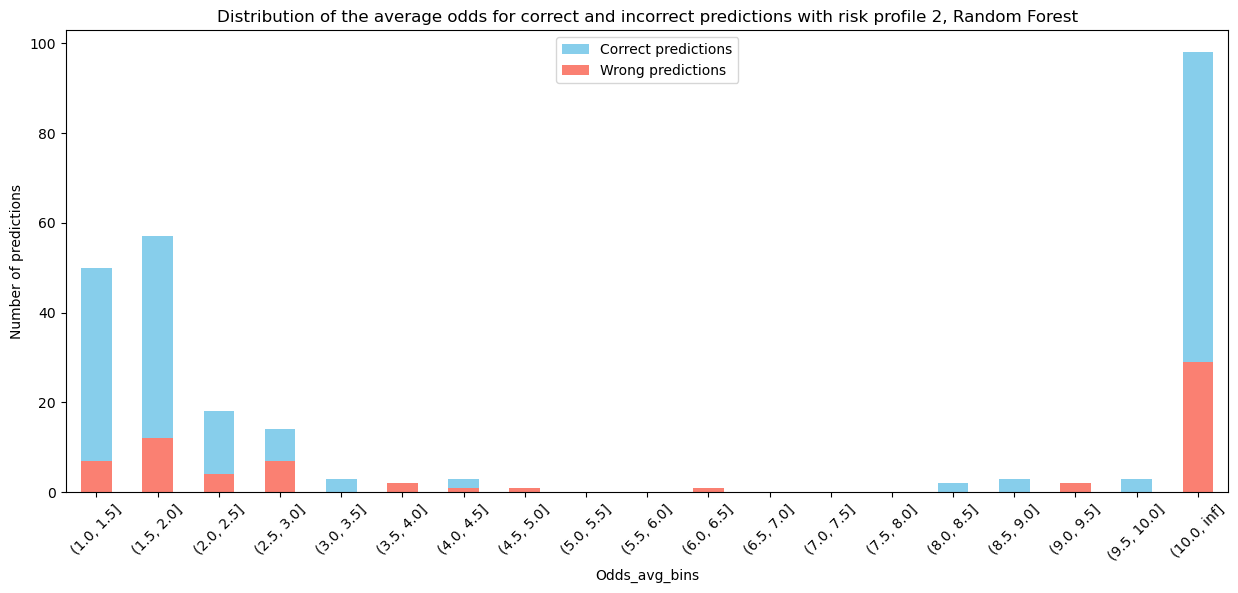

In [88]:
# Putting the winning and losing odds int bins and plotting the distribution
bins = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, np.inf]
correct_pred['Odds_avg_bins'] = pd.cut(correct_pred['Odds_avg'], bins)
wrong_pred['Odds_avg_bins'] = pd.cut(wrong_pred['Odds_avg'], bins)

plt.figure(figsize=(15, 6))

# Plotting correct predictions
correct_pred['Odds_avg_bins'].value_counts().sort_index().plot(kind='bar', color='skyblue', label = 'Correct predictions')
plt.title('Distribution of the average odds for correct and incorrect predictions with risk profile 2, Random Forest')
plt.xlabel('Average odds')
plt.ylabel('Number of predictions')
plt.xticks(rotation=45)

# Plotting wrong predictions
wrong_pred['Odds_avg_bins'].value_counts().sort_index().plot(kind='bar', color='salmon', label = 'Wrong predictions')
plt.xticks(rotation=45)
plt.legend(loc = 'upper center')
plt.show()

##### Risk Profile 3

In [89]:
# Testing the function with risk profile 1 - Suggesting only predictions with a probability of 75% or higher. Safest option
score, risk3_pred = XGBModel(risk_profile=3)

DatetimeIndex(['2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09',
               '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 3: 0.7241379310344828


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13594,Spezia,Verona,2022-01-06,A,A,0.591786
13596,Sassuolo,Genoa,2022-01-06,D,H,0.827302
13598,AC Milan,Roma,2022-01-06,H,H,0.853166
13599,Bayern Munich,Borussia M.Gladbach,2022-01-07,A,H,0.812913
13600,Bordeaux,Marseille,2022-01-07,A,A,0.737544
13609,Real Madrid,Valencia,2022-01-08,H,H,0.937606
13601,Real Sociedad,Celta Vigo,2022-01-08,H,H,0.865235
13602,Lens,Rennes,2022-01-08,H,D,0.559084
13603,RB Leipzig,Mainz 05,2022-01-08,H,H,0.995883
13604,Granada,Barcelona,2022-01-08,D,H,0.801608


DatetimeIndex(['2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 3: 0.7368421052631579


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13637,Nice,Nantes,2022-01-14,H,H,0.978234
13638,Borussia Dortmund,Freiburg,2022-01-14,H,H,0.621709
13639,Brighton,Crystal Palace,2022-01-14,D,D,0.625627
13644,Wolfsburg,Hertha Berlin,2022-01-15,D,H,0.916019
13643,Aston Villa,Manchester United,2022-01-15,D,H,0.872752
13642,VfB Stuttgart,RB Leipzig,2022-01-15,A,A,0.892600
13645,Union Berlin,Hoffenheim,2022-01-15,H,H,0.927099
13640,Manchester City,Chelsea,2022-01-15,H,H,0.889170
13647,Wolverhampton Wanderers,Southampton,2022-01-15,H,H,0.860755
13646,Borussia M.Gladbach,Bayer Leverkusen,2022-01-15,A,A,0.981302


DatetimeIndex(['2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 3: 0.75


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13688,Verona,Bologna,2022-01-21,H,H,0.713469
13689,Espanyol,Real Betis,2022-01-21,A,A,0.950510
13687,Lyon,Saint-Etienne,2022-01-21,H,H,0.945713
13690,Eintracht Frankfurt,Arminia Bielefeld,2022-01-21,A,A,0.883801
13697,Lens,Marseille,2022-01-22,A,A,0.731905
13695,Inter,Venezia,2022-01-22,H,H,0.962291
13692,Southampton,Manchester City,2022-01-22,D,D,0.642279
13693,Brentford,Wolverhampton Wanderers,2022-01-22,A,A,0.574366
13691,Manchester United,West Ham,2022-01-22,H,H,0.627260
13698,Genoa,Udinese,2022-01-22,D,D,0.920530


DatetimeIndex(['2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30',
               '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 3: 1.0


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13736,Lyon,Marseille,2022-02-01,H,H,0.834007


DatetimeIndex(['2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
               '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 3: 0.7435897435897436


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13737,Marseille,Angers,2022-02-04,H,H,0.909220
13738,Hertha Berlin,Bochum,2022-02-04,D,A,0.694496
13739,Getafe,Levante,2022-02-04,H,H,0.955975
13740,Celta Vigo,Rayo Vallecano,2022-02-05,H,H,0.602952
13741,Osasuna,Sevilla,2022-02-05,D,A,0.635340
13744,Saint-Etienne,Montpellier,2022-02-05,H,D,0.586450
13745,Monaco,Lyon,2022-02-05,H,H,0.857413
13746,Augsburg,Union Berlin,2022-02-05,H,H,0.705063
13743,Mallorca,Cadiz,2022-02-05,H,H,0.738542
13755,FC Cologne,Freiburg,2022-02-05,H,H,0.631340


DatetimeIndex(['2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
               '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 3: 0.775


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13784,Liverpool,Leicester,2022-02-10,H,H,0.960226
13785,Wolverhampton Wanderers,Arsenal,2022-02-10,A,D,0.557035
13786,Sevilla,Elche,2022-02-11,H,H,0.596030
13787,RB Leipzig,FC Cologne,2022-02-11,H,H,0.960251
13797,Cadiz,Celta Vigo,2022-02-12,D,D,0.594751
13796,Eintracht Frankfurt,Wolfsburg,2022-02-12,A,A,0.913187
13794,Villarreal,Real Madrid,2022-02-12,D,A,0.904358
13790,Montpellier,Lille,2022-02-12,A,A,0.736534
13792,Lyon,Nice,2022-02-12,H,H,0.979471
13791,Watford,Brighton,2022-02-12,A,A,0.756959


DatetimeIndex(['2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 3: 0.7317073170731707


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13836,Elche,Rayo Vallecano,2022-02-18,H,H,0.864275
13837,Juventus,Torino,2022-02-18,D,H,0.860326
13838,Lille,Metz,2022-02-18,D,D,0.834012
13839,Mainz 05,Bayer Leverkusen,2022-02-18,H,A,0.667605
13844,Brighton,Burnley,2022-02-19,A,A,0.659372
13840,Manchester City,Tottenham,2022-02-19,A,A,0.738297
13843,Crystal Palace,Chelsea,2022-02-19,A,A,0.807936
13842,Liverpool,Norwich,2022-02-19,H,H,0.988397
13841,Southampton,Everton,2022-02-19,H,H,0.980046
13850,Granada,Villarreal,2022-02-19,A,A,0.988186


DatetimeIndex(['2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28',
               '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 3: 0.8205128205128205


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13890,Genoa,Inter,2022-02-25,D,D,0.606085
13891,Southampton,Norwich,2022-02-25,H,H,0.960512
13892,Levante,Elche,2022-02-25,H,H,0.803158
13893,Montpellier,Rennes,2022-02-25,A,A,0.927932
13903,Empoli,Juventus,2022-02-26,A,A,0.976855
13900,Freiburg,Hertha Berlin,2022-02-26,H,H,0.959756
13908,Brentford,Newcastle United,2022-02-26,A,A,0.794307
13898,Salernitana,Bologna,2022-02-26,D,D,0.821955
13896,Bayer Leverkusen,Arminia Bielefeld,2022-02-26,H,H,0.993019
13905,Leeds,Tottenham,2022-02-26,A,A,0.969097


DatetimeIndex(['2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 3: 0.8518518518518519


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
13946,Udinese,Sampdoria,2022-03-05,H,H,0.557376
13950,Cagliari,Lazio,2022-03-05,A,A,0.927564
13947,Lens,Brest,2022-03-05,A,H,0.782100
13942,Bochum,Greuther Fuerth,2022-03-05,H,H,0.949497
13943,Hertha Berlin,Eintracht Frankfurt,2022-03-05,A,A,0.947329
13952,RB Leipzig,Freiburg,2022-03-05,D,D,0.556906
13948,Nice,Paris Saint Germain,2022-03-05,H,H,0.780872
13958,Newcastle United,Brighton,2022-03-05,H,H,0.691548
13955,Wolverhampton Wanderers,Crystal Palace,2022-03-05,A,A,0.939473
13953,Osasuna,Villarreal,2022-03-05,H,H,0.590225


DatetimeIndex(['2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 3: 0.6440677966101694


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
14014,Everton,Wolverhampton Wanderers,2022-03-13,A,D,0.655347
14018,Real Sociedad,Alaves,2022-03-13,H,H,0.963492
14017,Real Betis,Athletic Club,2022-03-13,H,H,0.615633
14015,Chelsea,Newcastle United,2022-03-13,H,D,0.763561
14010,Arsenal,Leicester,2022-03-13,H,H,0.991588
14013,Barcelona,Osasuna,2022-03-13,H,H,0.970709
14012,Fiorentina,Bologna,2022-03-13,H,H,0.938652
14011,Leeds,Norwich,2022-03-13,H,H,0.858405
14020,Clermont,Lorient,2022-03-13,A,A,0.590865
14019,Greuther Fuerth,RB Leipzig,2022-03-13,A,A,0.991971


DatetimeIndex(['2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04'],
              dtype='datetime64[ns]', freq='D')
Accuracy for the selected date range with a risk profile of 3: 0.7435897435897436


,HomeTeam,AwayTeam,Date,Actual Result,Predicted Result,Probability
14085,Union Berlin,FC Cologne,2022-04-01,H,H,0.887064
14096,Hoffenheim,Bochum,2022-04-02,A,H,0.935683
14088,Freiburg,Bayern Munich,2022-04-02,A,A,0.965019
14089,Lazio,Sassuolo,2022-04-02,H,H,0.627898
14091,Liverpool,Watford,2022-04-02,H,H,0.872034
14092,Brighton,Norwich,2022-04-02,D,D,0.870158
14093,Burnley,Manchester City,2022-04-02,A,A,0.971026
14094,Borussia Dortmund,RB Leipzig,2022-04-02,A,A,0.906719
14095,Atletico Madrid,Alaves,2022-04-02,H,H,0.997087
14086,Salernitana,Torino,2022-04-02,A,A,0.850306


Accuracy for the overall test data with a risk profile of 3: 0.7518072289156627 



In [90]:
# Calculating the share of predicted matches
share_risk3 = round(((risk3_pred.shape[0] / all_leagues_test.shape[0]) * 100),2)
print('Using a risk profile = 3, i.e. the riskiest option, we will suggest to the customer to bet on just {}% of the games'.format(share_risk3))

Using a risk profile = 3, i.e. the riskiest option, we will suggest to the customer to bet on just 45.45% of the games


In [91]:
odds = all_leagues_test.loc[risk3_pred.index, ['HomeTeam','AwayTeam','Date','B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 
                                                'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']]
risk3_pred = pd.merge(risk3_pred, odds, left_index=True, right_index=True)

In [92]:
# Selecting the winning predictions and calculating the avg odd
correct_pred = risk3_pred[risk3_pred['Actual Result'] == risk3_pred['Predicted Result']].copy()
correct_pred['Odds_avg'] = correct_pred.apply(lambda x: (x['B365H']+x['BWH']+x['IWH']+x['PSH']+x['WHH']+x['VCH']+x['PSCH'])/7
                                            if x['Predicted Result'] == 'H' else x['B365D']+x['BWD']+x['IWD']+x['PSD']+x['WHD']+x['VCD']+x['PSCD']
                                            if x['Predicted Result'] == 'D' else x['B365A']+x['BWA']+x['IWA']+x['PSA']+x['WHA']+x['VCA']+x['PSCA'], axis=1)
correct_pred.drop(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
                    'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'], axis=1, inplace=True)

# Selecting the loosing predictions and calculating the avg odd
wrong_pred = risk3_pred[risk3_pred['Actual Result'] != risk3_pred['Predicted Result']].copy()
wrong_pred['Odds_avg'] = wrong_pred.apply(lambda x: (x['B365H']+x['BWH']+x['IWH']+x['PSH']+x['WHH']+x['VCH']+x['PSCH'])/7
                                            if x['Predicted Result'] == 'H' else x['B365D']+x['BWD']+x['IWD']+x['PSD']+x['WHD']+x['VCD']+x['PSCD']
                                            if x['Predicted Result'] == 'D' else x['B365A']+x['BWA']+x['IWA']+x['PSA']+x['WHA']+x['VCA']+x['PSCA'], axis=1)
wrong_pred.drop(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
                    'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA'], axis=1, inplace=True)

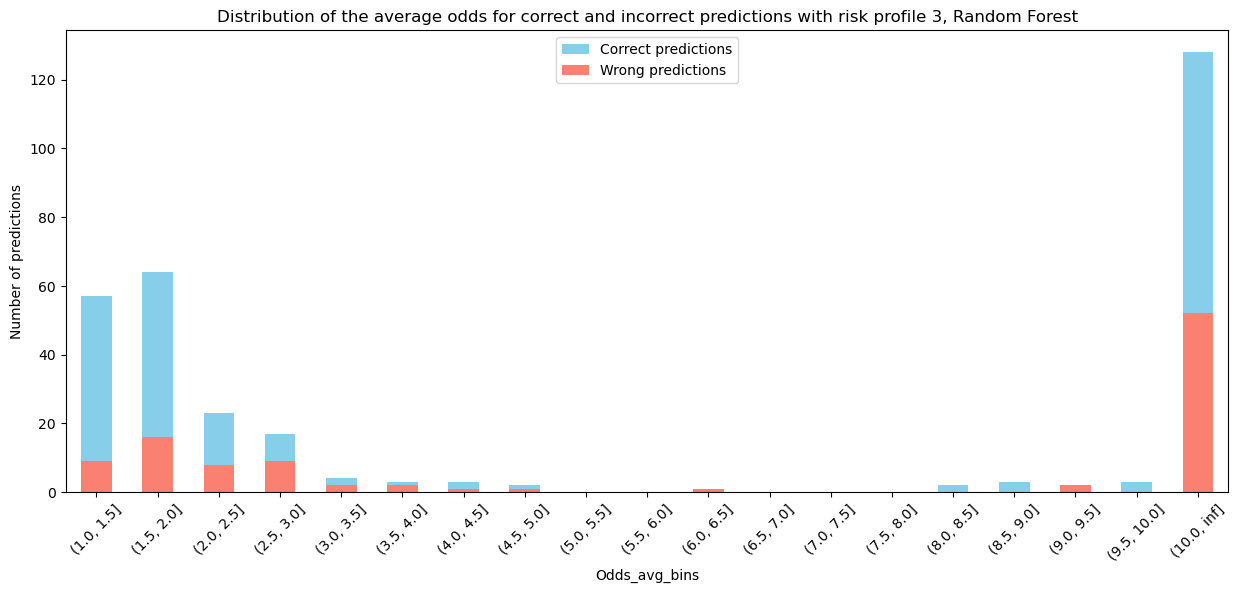

In [93]:
# Putting the winning and losing odds int bins and plotting the distribution
bins = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, np.inf]
correct_pred['Odds_avg_bins'] = pd.cut(correct_pred['Odds_avg'], bins)
wrong_pred['Odds_avg_bins'] = pd.cut(wrong_pred['Odds_avg'], bins)

plt.figure(figsize=(15, 6))

# Plotting correct predictions
correct_pred['Odds_avg_bins'].value_counts().sort_index().plot(kind='bar', color='skyblue', label = 'Correct predictions')
plt.title('Distribution of the average odds for correct and incorrect predictions with risk profile 3, Random Forest')
plt.xlabel('Average odds')
plt.ylabel('Number of predictions')
plt.xticks(rotation=45)

# Plotting wrong predictions
wrong_pred['Odds_avg_bins'].value_counts().sort_index().plot(kind='bar', color='salmon', label = 'Wrong predictions')
plt.xticks(rotation=45)
plt.legend(loc = 'upper center')
plt.show()